#### Objective : Univariate Time Series Modelling using DARTS for model training and weight & Biases for model logging to beat the becnhmark model already provided

#### Created By : Ashwini Kumar

#### Start Date : 22th March 2022

#### Steps Involved :

    1. Read the data from the csv file and split into train and validation splits 
    
    2. Try out all the models in DARTs for "req_ThunB2B_Sorter" series
    
    3. Find out the model which gives the best performance

In [5]:
# Import the required packages 
from darts import TimeSeries
import pandas as pd
import tqdm as notebook_tqdm
from darts.dataprocessing.transformers import Scaler
from darts.models import RNNModel, ExponentialSmoothing, BlockRNNModel
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf
from darts.datasets import AirPassengersDataset, SunspotsDataset
from darts.utils.timeseries_generation import datetime_attribute_timeseries
import wandb ## Function for weights and biases
import plotly
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import RNNModel, ExponentialSmoothing, BlockRNNModel,NBEATSModel,TransformerModel,AutoARIMA,TFTModel
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf
from darts.datasets import AirPassengersDataset, SunspotsDataset
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.models import TCNModel, RNNModel
from darts.models import FFT, AutoARIMA, ExponentialSmoothing, Prophet, Theta
import os
# Remove Noise using the Gaussian Wave

from sklearn.gaussian_process.kernels import ExpSineSquared, RBF
from darts.models import GaussianProcessFilter

In [6]:
os.getcwd()

'C:\\Users\\ashwini.kumar\\Time_Series_Modelling\\Codes'

In [11]:
# Function to read the csv file from given location & parse datetime properly
def load_dataframe(filename):
    df = pd.read_csv(filename)
    df["Date"] = pd.to_datetime(df["Date"])
    return df

# Function create the Time Series from Dataframe using a Time Series to df function
def df_to_timeseries(df,time_column, timeseries):
    series = TimeSeries.from_dataframe(df, time_column,timeseries)
    return (series)

# Define the Mean Absolute Error for evaluating our model
from darts.metrics import mae
def eval_error(actual_values,pred_values):
    return mae(actual_values,pred_values)

# Call the function to read the data properly

df = load_dataframe("C:\\Users\\ashwini.kumar\\Time_Series_Modelling\\_Final_master_df_2022_2017_v9_with_Bolzano.csv")
df.head(5)




Date  RequestedQTY  GoodsIssuedQTY  InvoicedQTY  PDO number  req_Illy  \
0 2017-01-02      227928.0        217034.0     216049.0       12075     12851   
1 2017-01-09      176524.0        167839.0     166669.0       10663     14442   
2 2017-01-16      289548.0        280089.0     279048.0       12330     14555   
3 2017-01-23      248337.0        234044.0     232787.0       15942     15244   
4 2017-01-30      190462.0        175915.0     174835.0        9324     13200   

   req_Teddy  req_Thun  req_other  inv_Illy  ...  BOL_B2B AA Thun  \
0          0  215041.0         36     11866  ...              NaN   
1          0  162078.0          4     13272  ...              NaN   
2          0  274961.0         32     13514  ...              NaN   
3          0  233063.0         30     13987  ...              NaN   
4          0  177195.0         67     12120  ...              NaN   

   BOL_B2B P&P Thun  BOL_B2B Sorter Thun  BOL_B2B Sorter SM Thun  \
0               NaN                  NaN                     NaN   
1               NaN                  NaN                     NaN   
2               NaN                  NaN                     NaN   
3               NaN                  NaN                     NaN   
4               NaN                  NaN                     NaN   

   BOL_B2B Sorter BVB Thun  BOL_B2B Sorter riassortimenti WHS  BOL_B2C Thun  \
0                      NaN                                NaN           NaN   
1                      NaN                                NaN           NaN   
2                      NaN                                NaN           NaN   
3                      NaN                                NaN           NaN   
4                      NaN                                NaN           NaN   

   BOL_B2C Sorter Thun  BOL_B2C P2L Thun  BOL_Inbound Thun  
0                  NaN               NaN               NaN  
1                  NaN               NaN               NaN  
2                  NaN               NaN               NaN  
3                  NaN               NaN               NaN  
4                  NaN               NaN               NaN  

[5 rows x 61 columns]

In [12]:
# train_series = ["req_ThunB2B_Sorter", "req_ThunB2C","req_ThunB2B_AA", "req_ThunB2B_PP" ]
# benchmark_series = ["BOL_B2B Sorter Thun", "BOL_B2C Thun","BOL_B2B AA Thun", "BOL_B2B P&P Thun"]

In [13]:
df['Sum_All_Variables'] = df["req_ThunB2B_Sorter"] + df ["req_ThunB2C"] + df["req_ThunB2B_AA"] + df["req_ThunB2B_PP"]
df['Sum_All_Variables_Benchmark'] = df["BOL_B2B Sorter Thun"] + df ["BOL_B2C Thun"] + df["BOL_B2B AA Thun"] + df["BOL_B2B P&P Thun"]

# Run on Raw TimeSeries

Running for  req_ThunB2B_Sorter
Call the training function
Running for : AutoARIMA
Fitting the Model with Deafults Params : Auto-ARIMA
Benchmark Loss is : 33980.206896551725
Model Predict Loss is : 50768.43263824509


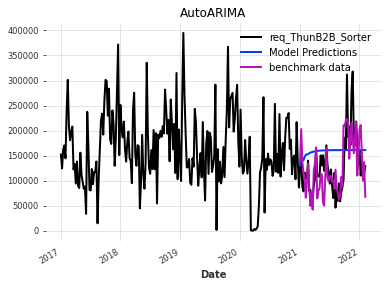

Running for : Prophet
Fitting the Model with Deafults Params : Prophet


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Benchmark Loss is : 33980.206896551725
Model Predict Loss is : 36773.932600319786


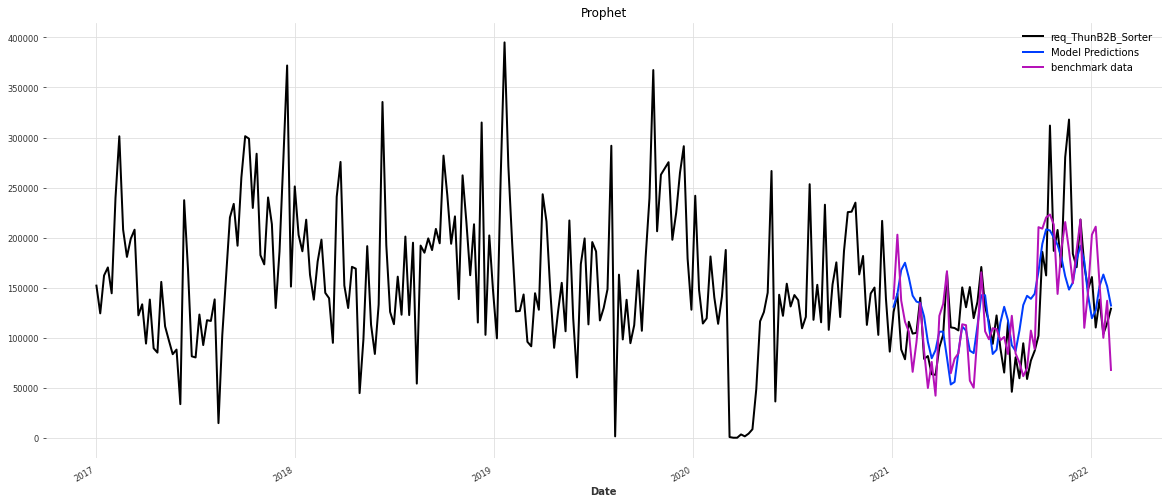

Running for : ExponentialSmoothing
Fitting the Model with Deafults Params : ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None
Benchmark Loss is : 33980.206896551725
Model Predict Loss is : 53204.27511373376


C:\Users\ashwini.kumar\source\repos\anaconda3\envs\practice\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


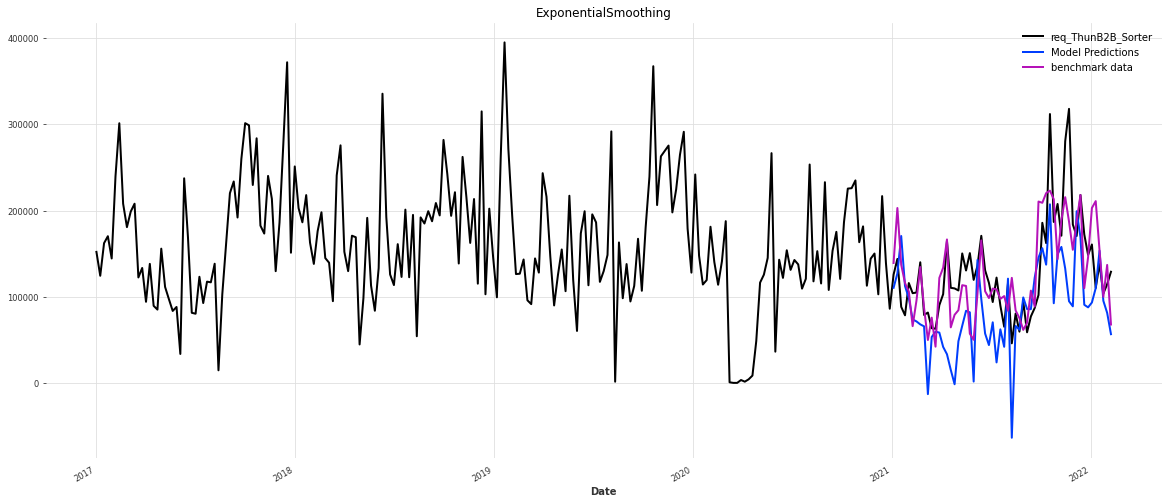

Running for : FFT
Fitting the Model with Deafults Params : FFT(nr_freqs_to_keep=10, trend=None)
Benchmark Loss is : 33980.206896551725
Model Predict Loss is : 55013.80546090092


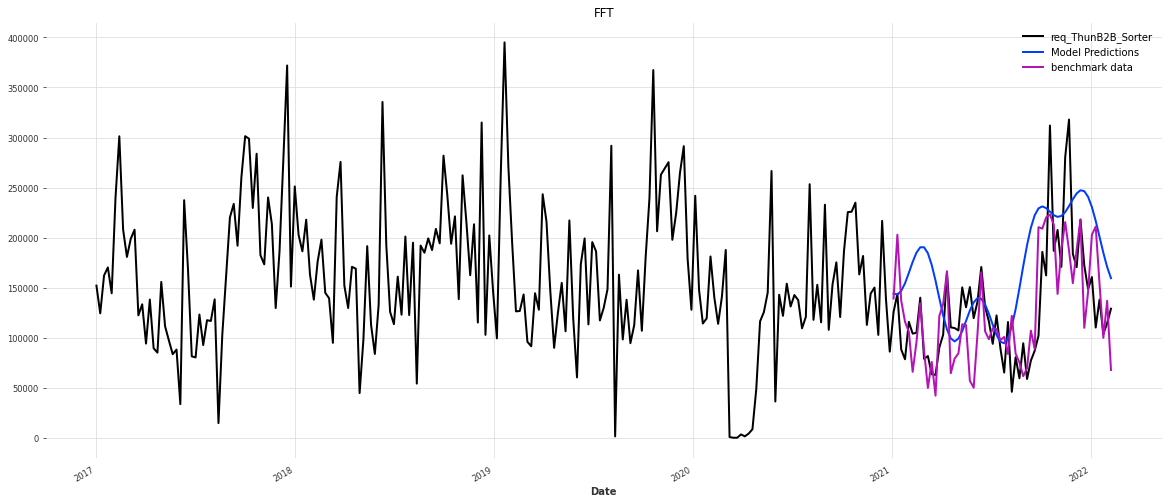

[2022-03-28 00:53:54,021] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
[2022-03-28 00:53:54,021] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 185 samples.
[2022-03-28 00:53:54,063] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 00:53:54,063] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type    | Params
--------------------------------------
0 | criterion | MSELoss | 0     
1 | rnn       | RNN     | 700   
2 | V         | Linear  

Running for : RNNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.rnn_model.RNNModel object at 0x0000019188BBE6C8>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 33980.206896551725
Model Predict Loss is : 130115.31642726394


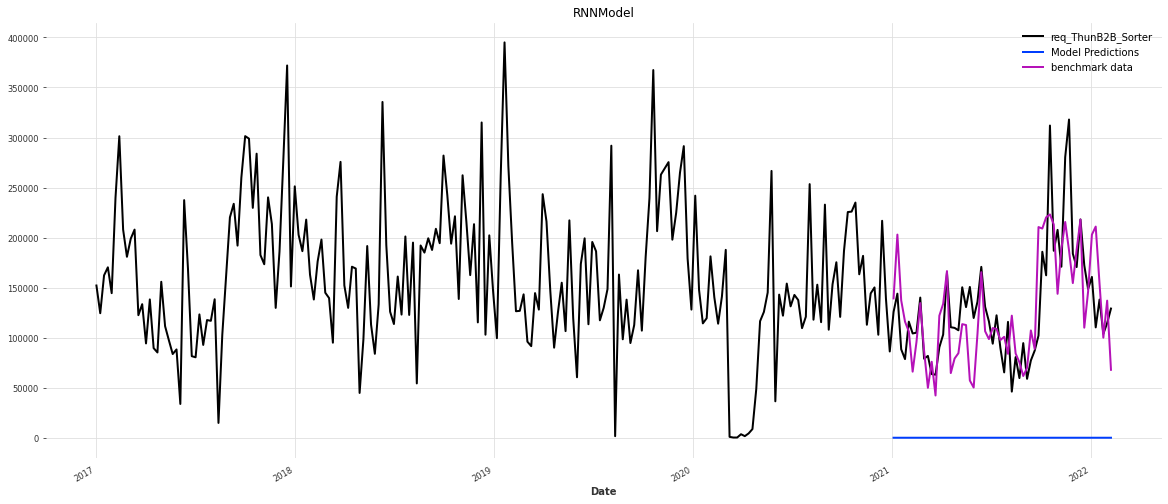

[2022-03-28 00:54:19,187] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-03-28 00:54:19,187] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-03-28 00:54:19,193] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
[2022-03-28 00:54:19,193] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
INFO:darts.models.forecasting.tcn_model:Number of layers chosen: 4
[2022-03-28 00:54:19,200] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 00:54:19,200] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available

Running for : TCNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.tcn_model.TCNModel object at 0x0000019188BC5608>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 33980.206896551725
Model Predict Loss is : 62378.6678240407


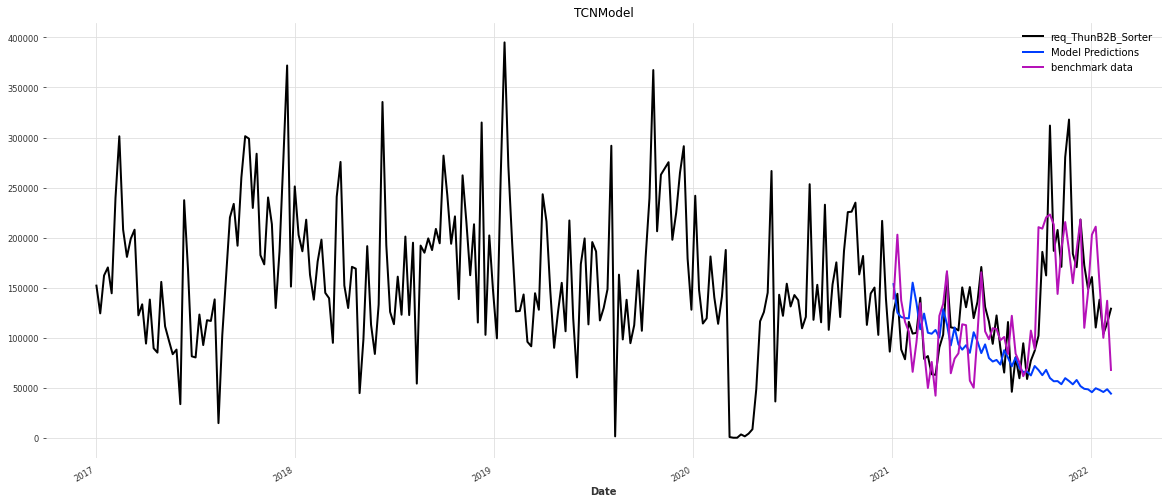

[2022-03-28 00:54:42,747] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-03-28 00:54:42,747] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-03-28 00:54:42,864] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 00:54:42,864] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type       | Params
-----------------------------------------
0 | criterion | MSELoss    | 0     
1 | stacks    | ModuleList | 6.3 M 
------------

Running for : NBEATSModel
Fitting the Model with Deafults Params : <darts.models.forecasting.nbeats.NBEATSModel object at 0x0000019188BC55C8>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 33980.206896551725
Model Predict Loss is : 59207.22410224617


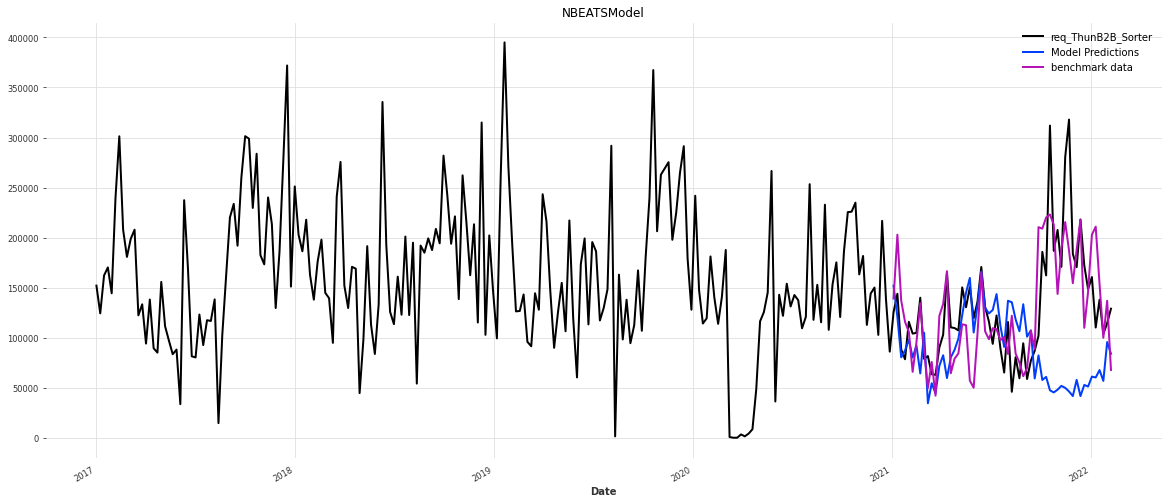

[2022-03-28 00:57:54,483] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-03-28 00:57:54,483] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-03-28 00:57:54,513] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 00:57:54,513] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             

Running for : TransformerModel
Fitting the Model with Deafults Params : <darts.models.forecasting.transformer_model.TransformerModel object at 0x0000019188BE9C88>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 33980.206896551725
Model Predict Loss is : 129940.1129499474


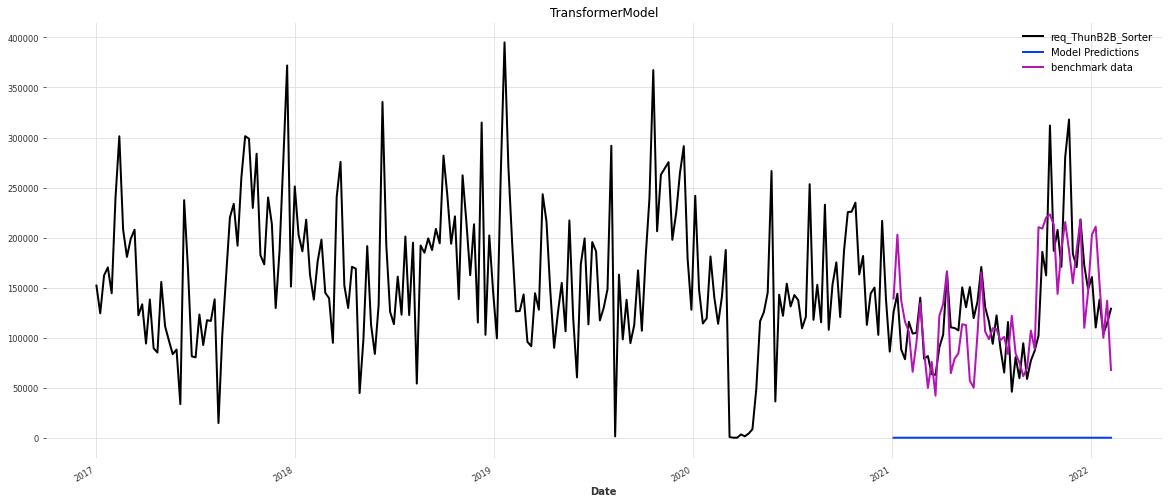

Running for  req_ThunB2C
Call the training function
Running for : AutoARIMA
Fitting the Model with Deafults Params : Auto-ARIMA
Benchmark Loss is : 4774.6551724137935
Model Predict Loss is : 5462.657342247932


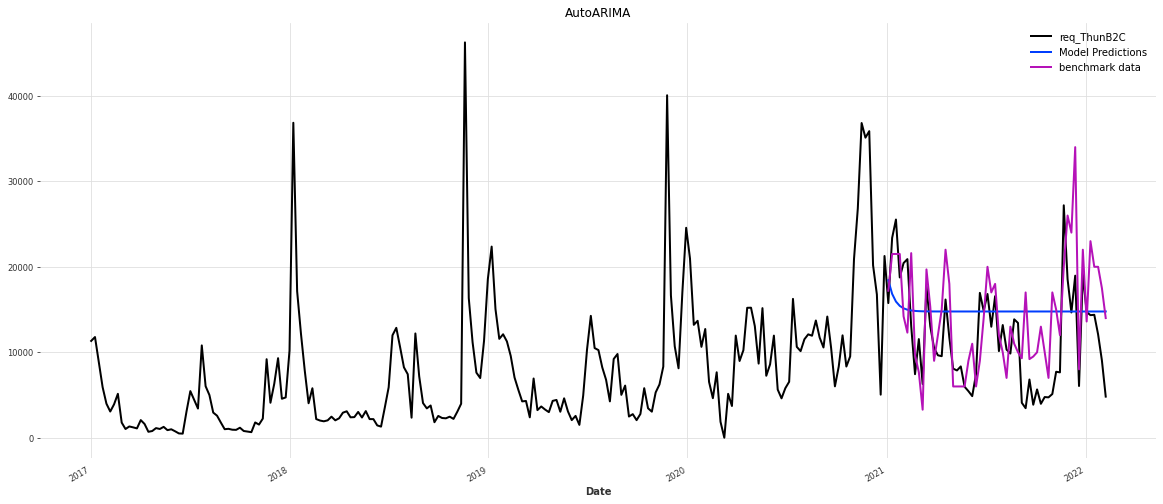

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Running for : Prophet
Fitting the Model with Deafults Params : Prophet
Benchmark Loss is : 4774.6551724137935
Model Predict Loss is : 6917.020245784935


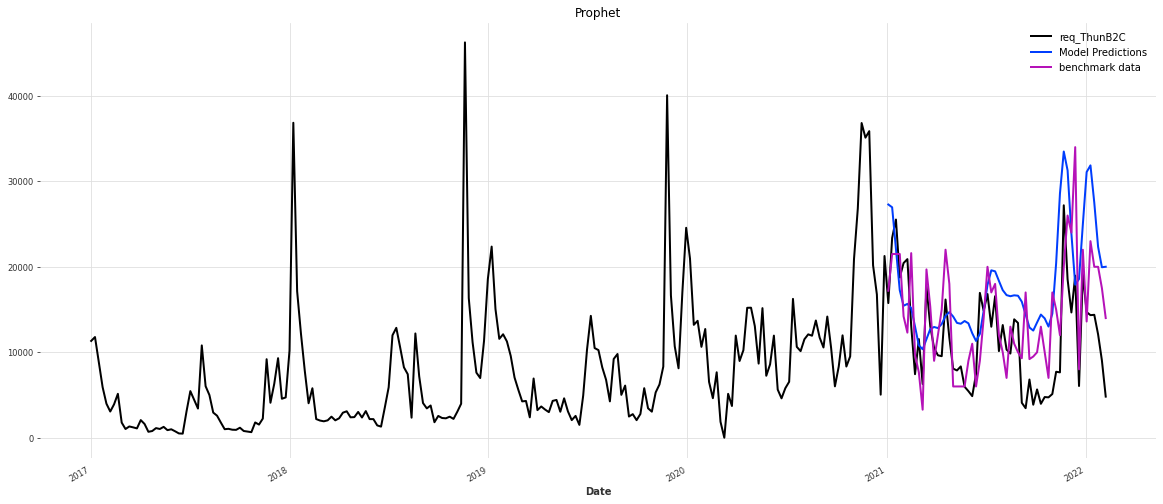

Running for : ExponentialSmoothing
Fitting the Model with Deafults Params : ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None


C:\Users\ashwini.kumar\source\repos\anaconda3\envs\practice\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


Benchmark Loss is : 4774.6551724137935
Model Predict Loss is : 8462.0865907823


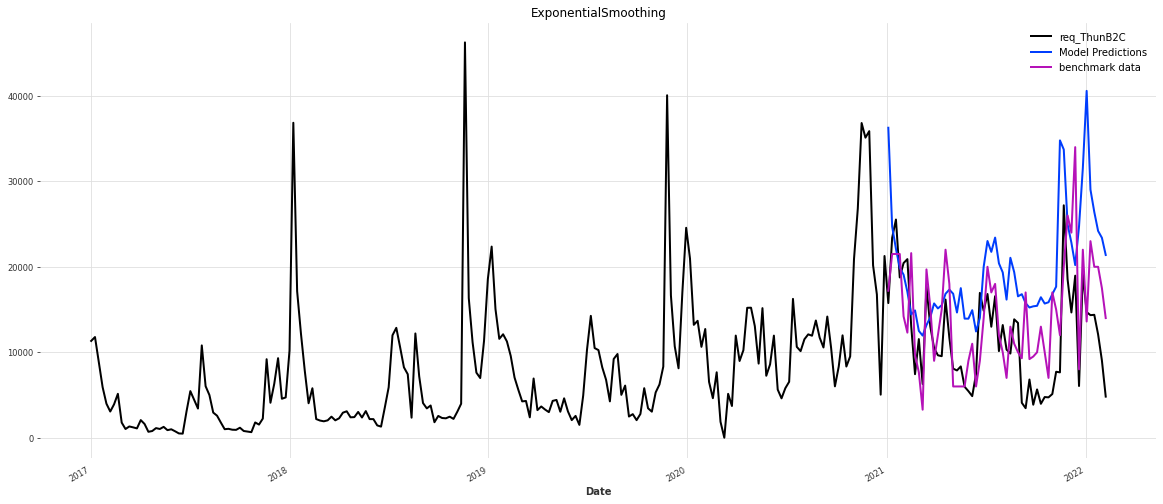

Running for : FFT
Fitting the Model with Deafults Params : FFT(nr_freqs_to_keep=10, trend=None)
Benchmark Loss is : 4774.6551724137935
Model Predict Loss is : 6867.6089460959765


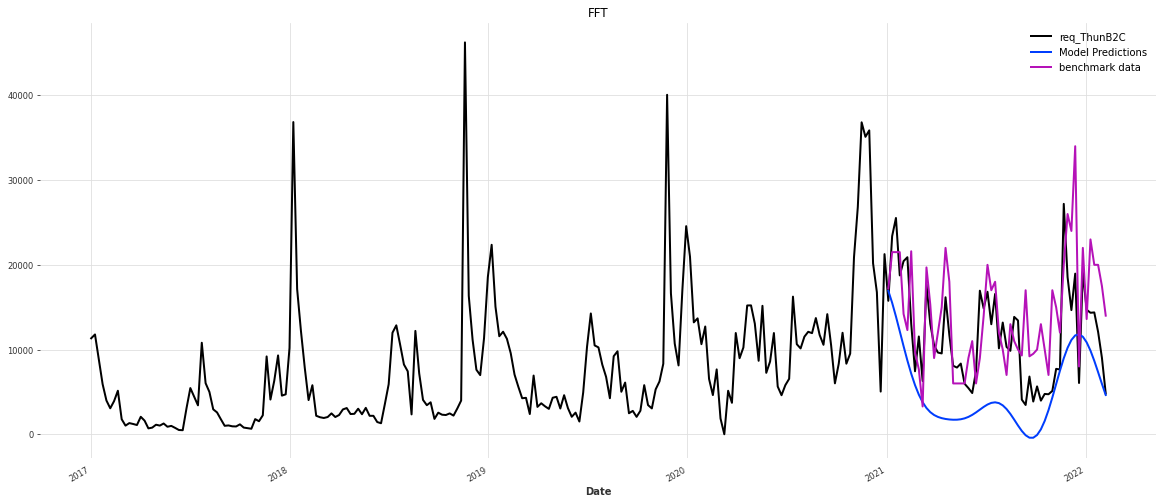

[2022-03-28 01:00:21,850] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
[2022-03-28 01:00:21,850] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 185 samples.
[2022-03-28 01:00:21,857] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 01:00:21,857] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type    | Params
--------------------------------------
0 | criterion | MSELoss | 0     
1 | rnn       | RNN     | 700   
2 | V         | Linear  

Running for : RNNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.rnn_model.RNNModel object at 0x00000191889E7D48>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 4774.6551724137935
Model Predict Loss is : 11707.21444308225


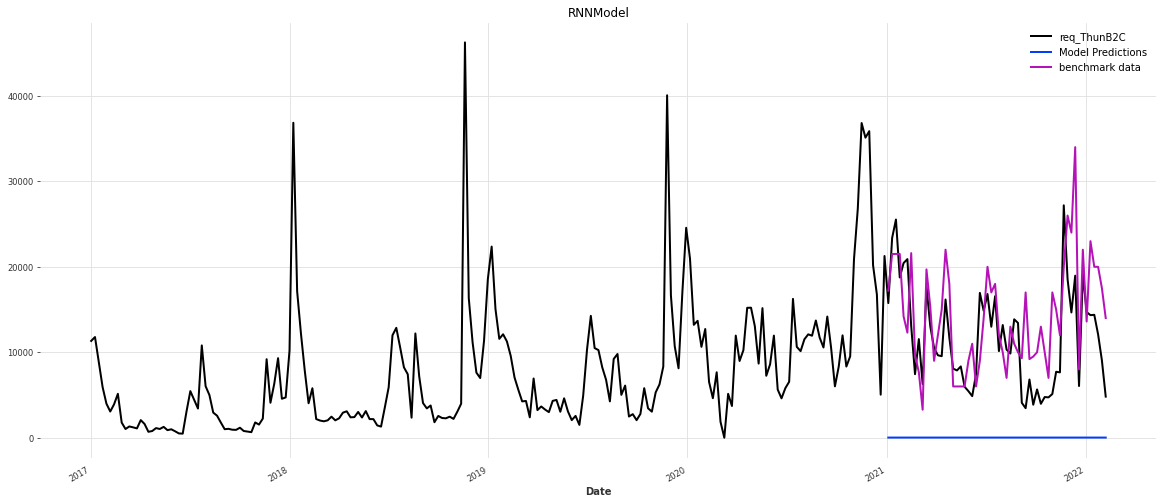

[2022-03-28 01:00:49,271] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-03-28 01:00:49,271] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-03-28 01:00:49,278] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
[2022-03-28 01:00:49,278] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
INFO:darts.models.forecasting.tcn_model:Number of layers chosen: 4
[2022-03-28 01:00:49,286] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 01:00:49,286] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available

Running for : TCNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.tcn_model.TCNModel object at 0x000001918A7ADA88>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 4774.6551724137935
Model Predict Loss is : 8130.689739427824


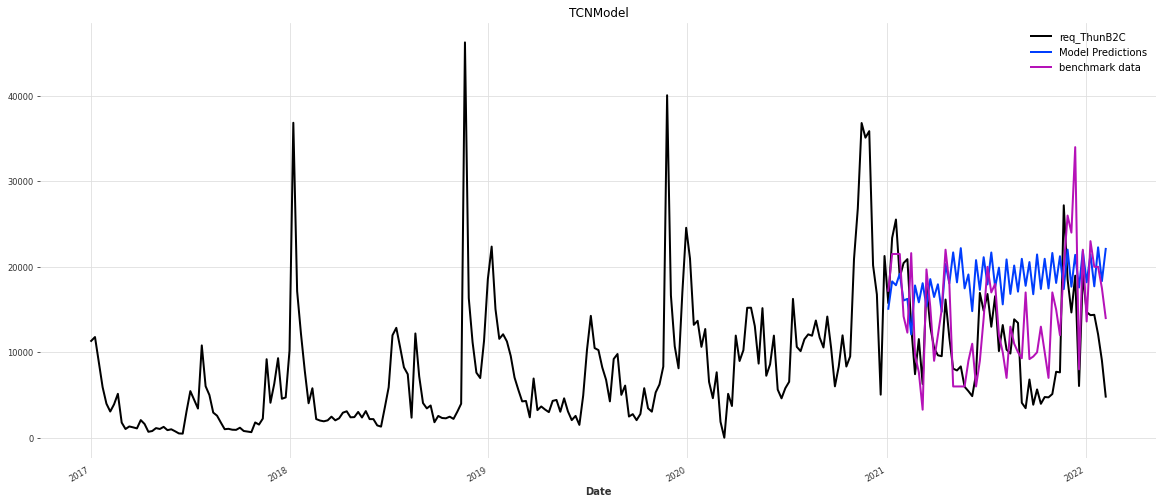

[2022-03-28 01:01:12,045] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-03-28 01:01:12,045] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-03-28 01:01:12,159] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 01:01:12,159] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type       | Params
-----------------------------------------
0 | criterion | MSELoss    | 0     
1 | stacks    | ModuleList | 6.3 M 
------------

Running for : NBEATSModel
Fitting the Model with Deafults Params : <darts.models.forecasting.nbeats.NBEATSModel object at 0x00000191899F7FC8>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 4774.6551724137935
Model Predict Loss is : 25806.572579258


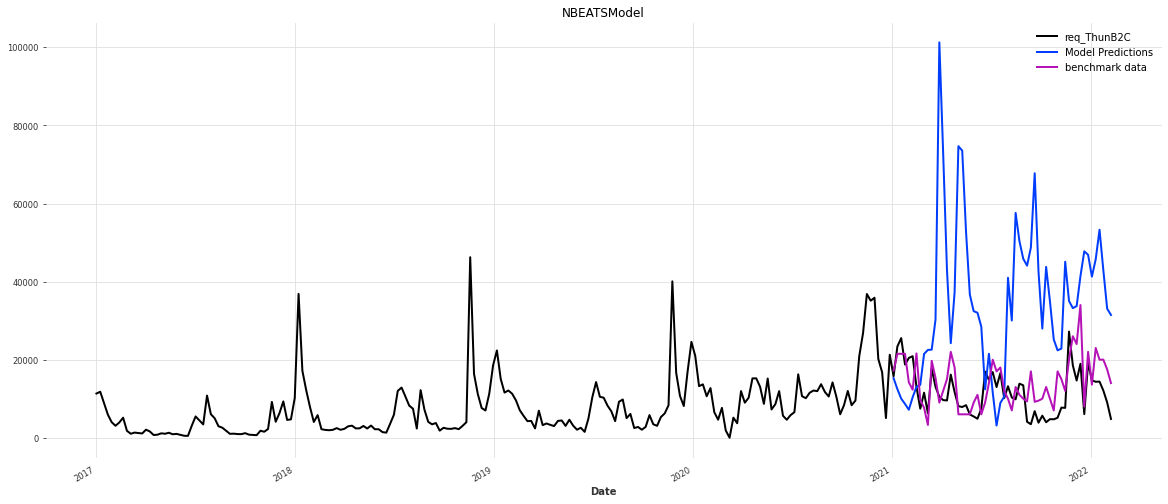

[2022-03-28 01:04:33,608] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-03-28 01:04:33,608] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-03-28 01:04:33,634] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 01:04:33,634] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             

Running for : TransformerModel
Fitting the Model with Deafults Params : <darts.models.forecasting.transformer_model.TransformerModel object at 0x000001918A5E9488>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 4774.6551724137935
Model Predict Loss is : 11537.777764469924


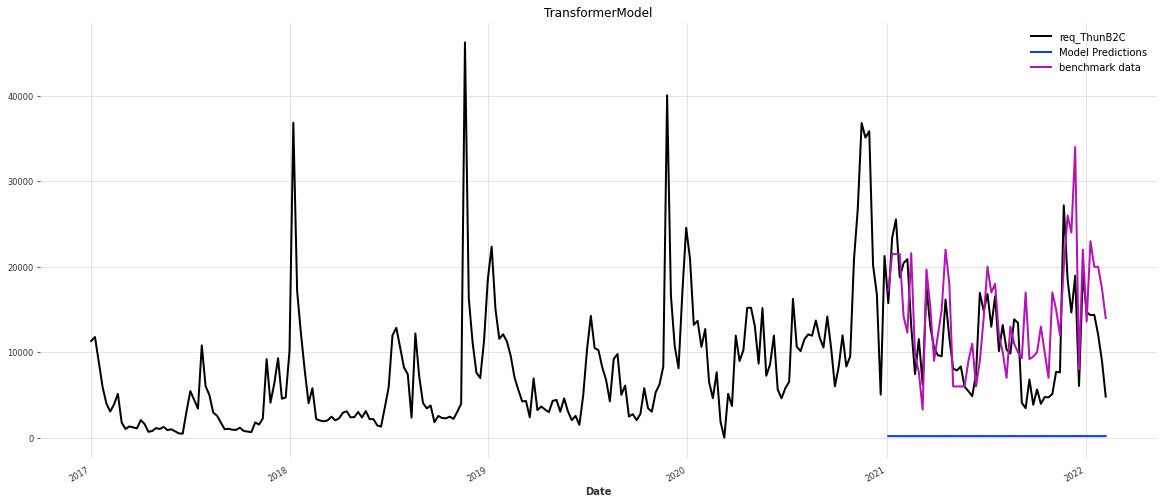

Running for  req_ThunB2B_AA
Call the training function
Running for : AutoARIMA
Fitting the Model with Deafults Params : Auto-ARIMA
Benchmark Loss is : 23509.689655172413
Model Predict Loss is : 17694.377852661735


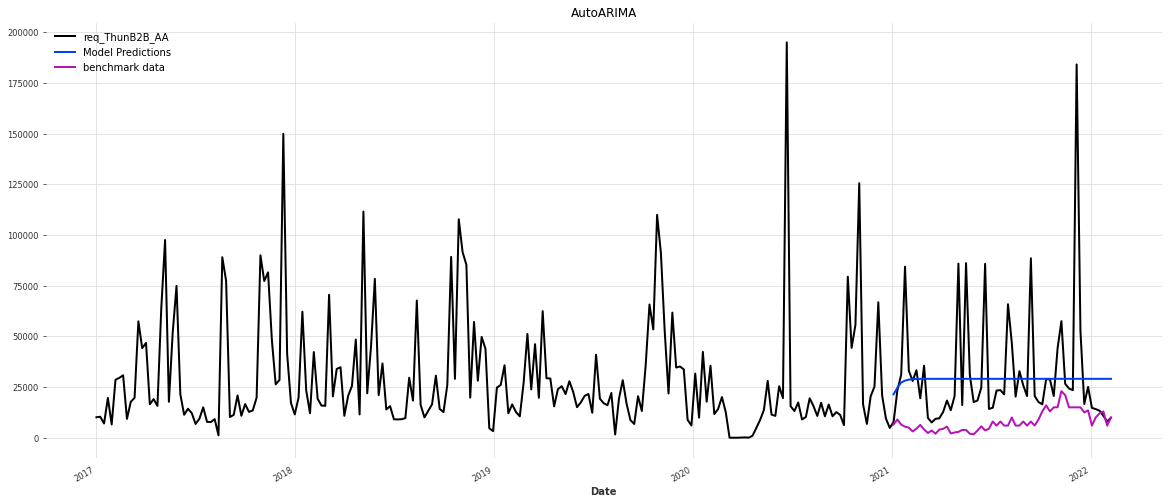

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Running for : Prophet
Fitting the Model with Deafults Params : Prophet
Benchmark Loss is : 23509.689655172413
Model Predict Loss is : 18743.686166701915


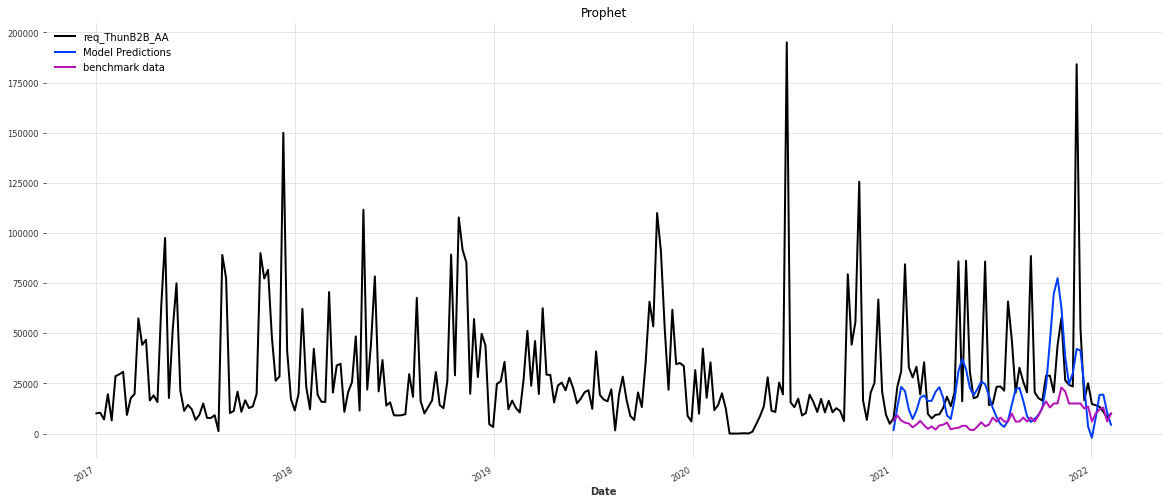

Running for : ExponentialSmoothing
Fitting the Model with Deafults Params : ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None


C:\Users\ashwini.kumar\source\repos\anaconda3\envs\practice\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


Benchmark Loss is : 23509.689655172413
Model Predict Loss is : 20217.880637059487


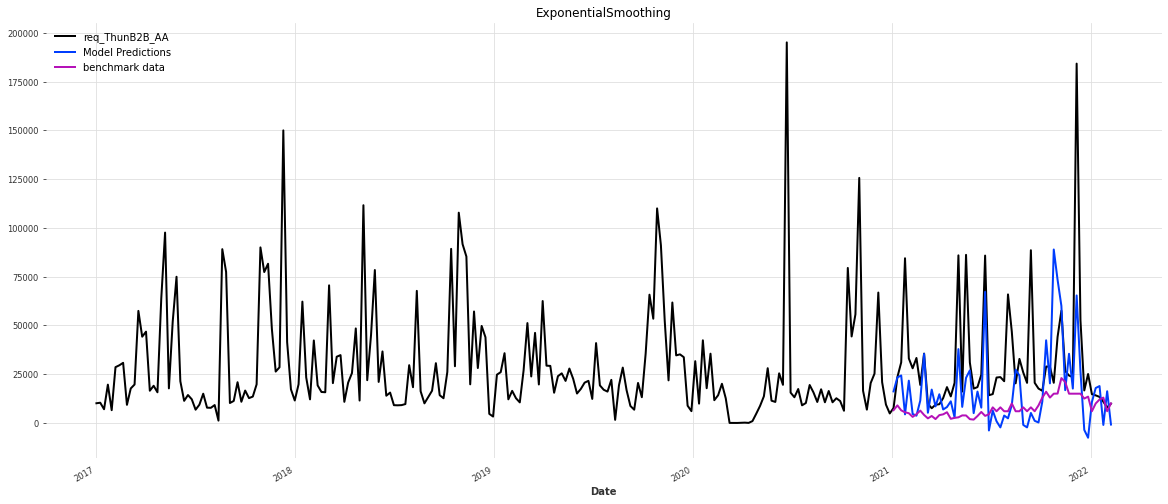

Running for : FFT
Fitting the Model with Deafults Params : FFT(nr_freqs_to_keep=10, trend=None)
Benchmark Loss is : 23509.689655172413
Model Predict Loss is : 17639.840814016414


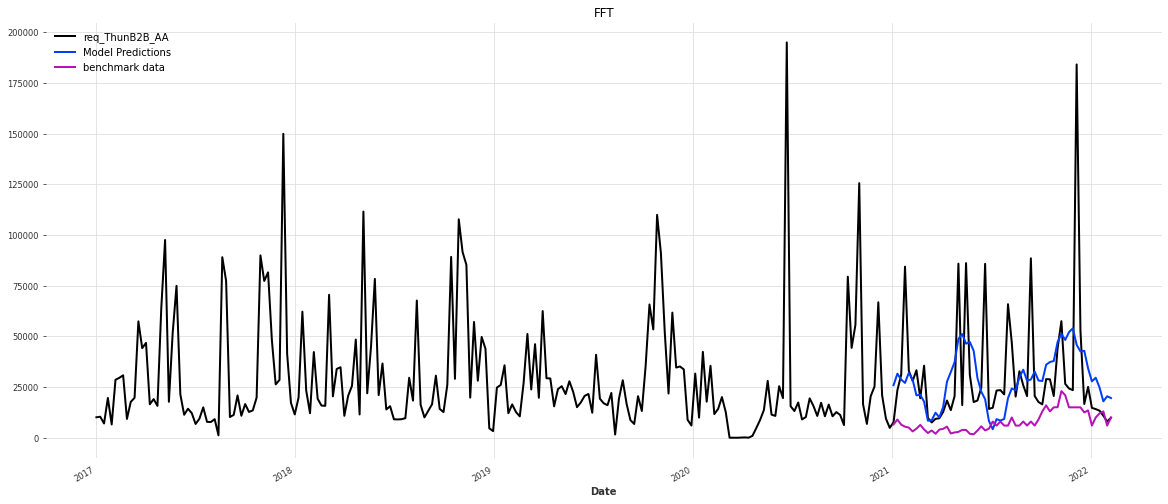

[2022-03-28 01:10:58,393] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
[2022-03-28 01:10:58,393] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 185 samples.
[2022-03-28 01:10:58,424] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 01:10:58,424] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type    | Params
--------------------------------------
0 | criterion | MSELoss | 0     
1 | rnn       | RNN     | 700   
2 | V         | Linear  

Running for : RNNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.rnn_model.RNNModel object at 0x000001918A815D88>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 23509.689655172413
Model Predict Loss is : 31353.739457666965


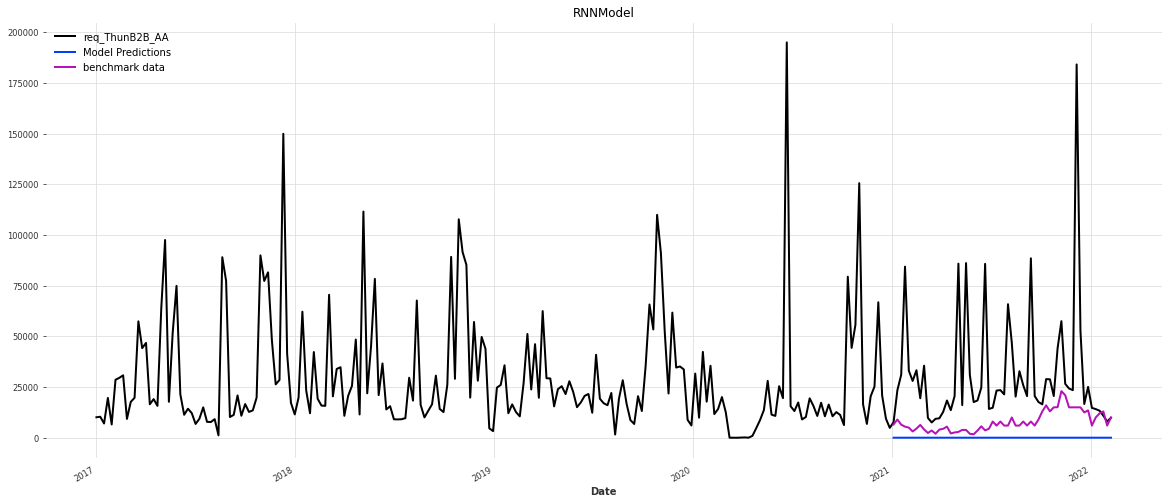

[2022-03-28 01:12:16,517] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-03-28 01:12:16,517] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-03-28 01:12:16,541] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
[2022-03-28 01:12:16,541] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
INFO:darts.models.forecasting.tcn_model:Number of layers chosen: 4
[2022-03-28 01:12:16,575] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 01:12:16,575] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available

Running for : TCNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.tcn_model.TCNModel object at 0x000001918A67F888>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 23509.689655172413
Model Predict Loss is : 17733.525269362992


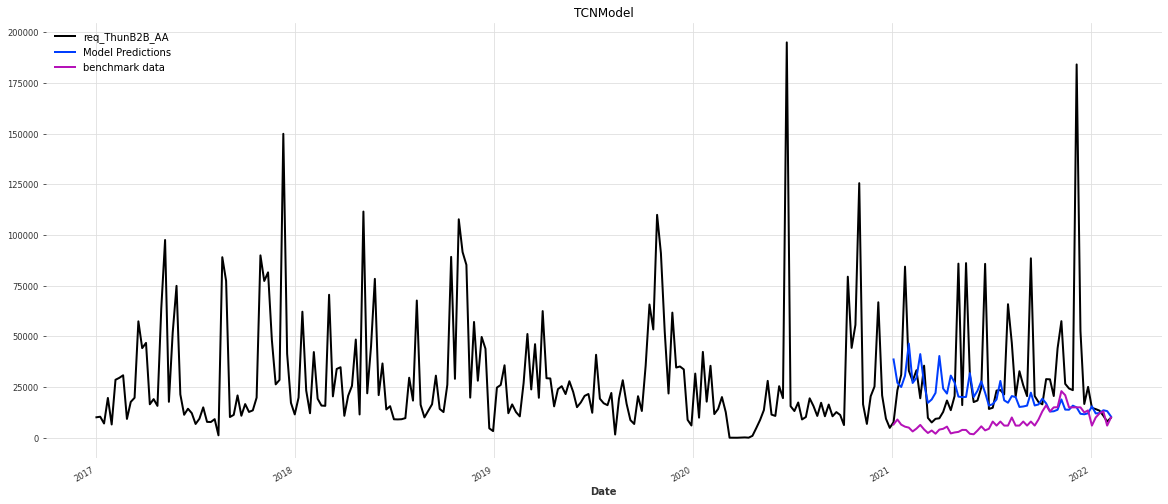

[2022-03-28 01:13:30,791] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-03-28 01:13:30,791] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.


Running for : NBEATSModel
Fitting the Model with Deafults Params : <darts.models.forecasting.nbeats.NBEATSModel object at 0x000001919B7A3788>


[2022-03-28 01:13:31,812] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 01:13:31,812] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type       | Params
-----------------------------------------
0 | criterion | MSELoss    | 0     
1 | stacks    | ModuleList | 6.3 M 
-----------------------------------------
6.3 M     Trainable params
1.5 K     Non-trainable params
6.3 M     Total params
50.072    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 23509.689655172413
Model Predict Loss is : 17745.888178898414


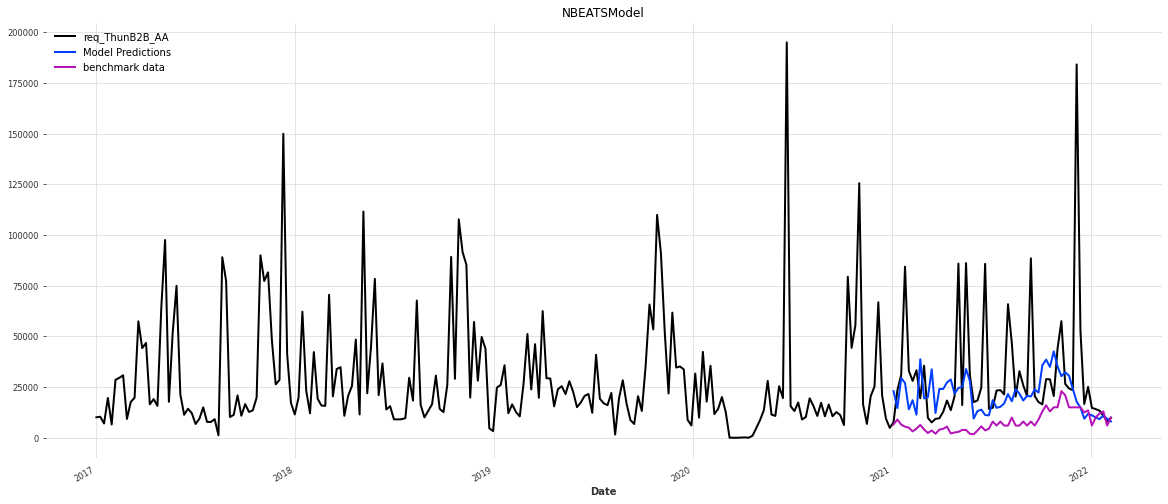

[2022-03-28 01:24:34,356] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-03-28 01:24:34,356] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-03-28 01:24:34,459] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 01:24:34,459] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Running for : TransformerModel
Fitting the Model with Deafults Params : <darts.models.forecasting.transformer_model.TransformerModel object at 0x0000019189967688>



  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | encoder             | Linear              | 128   
2 | positional_encoding | _PositionalEncoding | 0     
3 | transformer         | Transformer         | 548 K 
4 | decoder             | Linear              | 520   
------------------------------------------------------------
549 K     Trainable params
0         Non-trainable params
549 K     Total params
4.394     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 23509.689655172413
Model Predict Loss is : 31183.518253534385


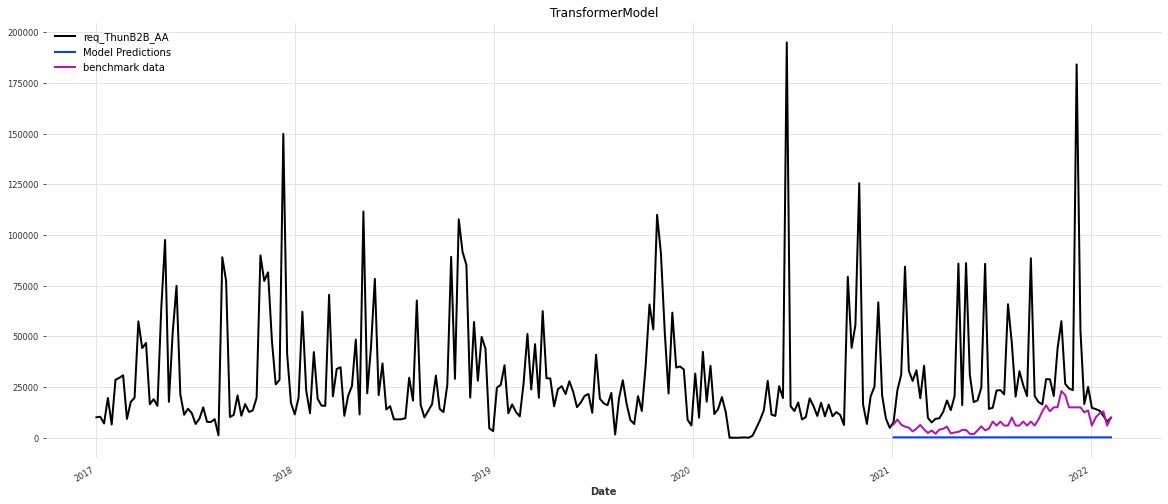

Running for  req_ThunB2B_PP
Call the training function
Running for : AutoARIMA
Fitting the Model with Deafults Params : Auto-ARIMA
Benchmark Loss is : 11758.01724137931
Model Predict Loss is : 10894.779748477597


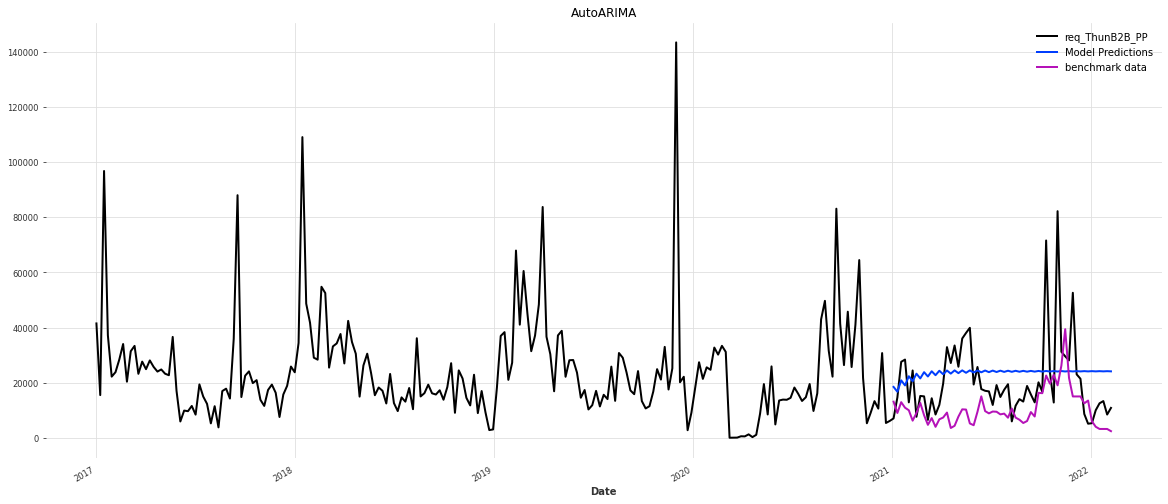

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Running for : Prophet
Fitting the Model with Deafults Params : Prophet
Benchmark Loss is : 11758.01724137931
Model Predict Loss is : 14060.963688053527


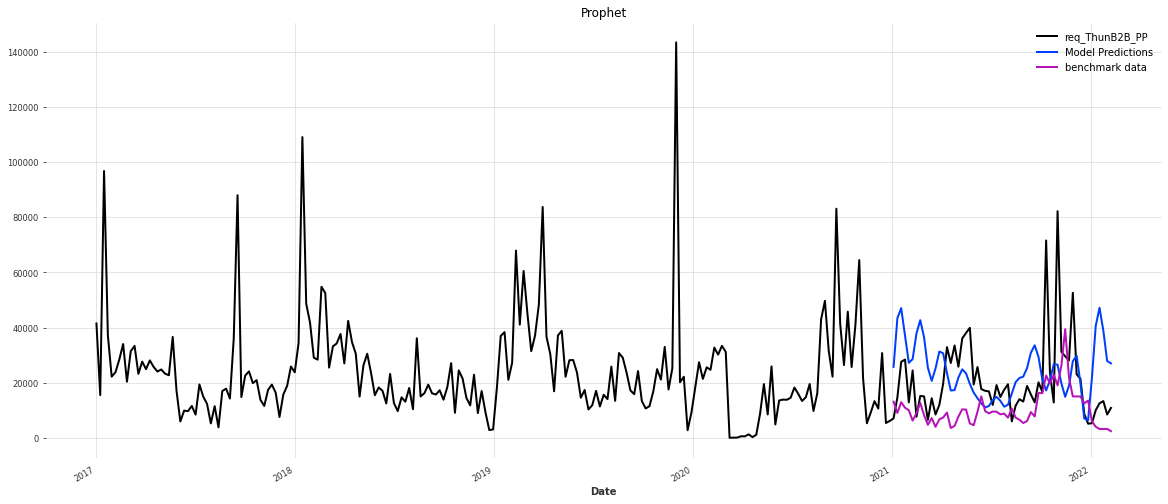

Running for : ExponentialSmoothing
Fitting the Model with Deafults Params : ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None


C:\Users\ashwini.kumar\source\repos\anaconda3\envs\practice\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


Benchmark Loss is : 11758.01724137931
Model Predict Loss is : 14878.617128673624


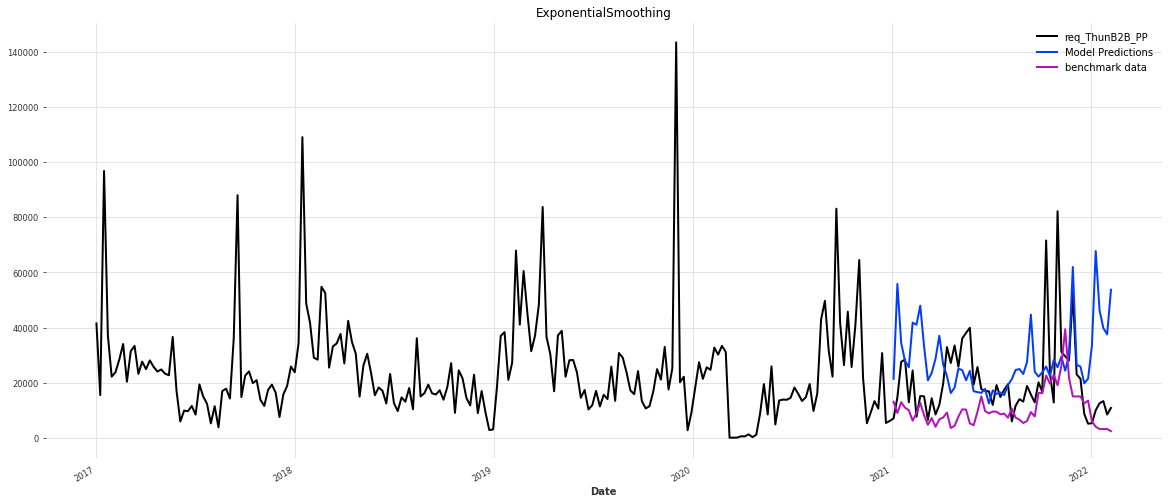

Running for : FFT
Fitting the Model with Deafults Params : FFT(nr_freqs_to_keep=10, trend=None)
Benchmark Loss is : 11758.01724137931
Model Predict Loss is : 14506.746694803147


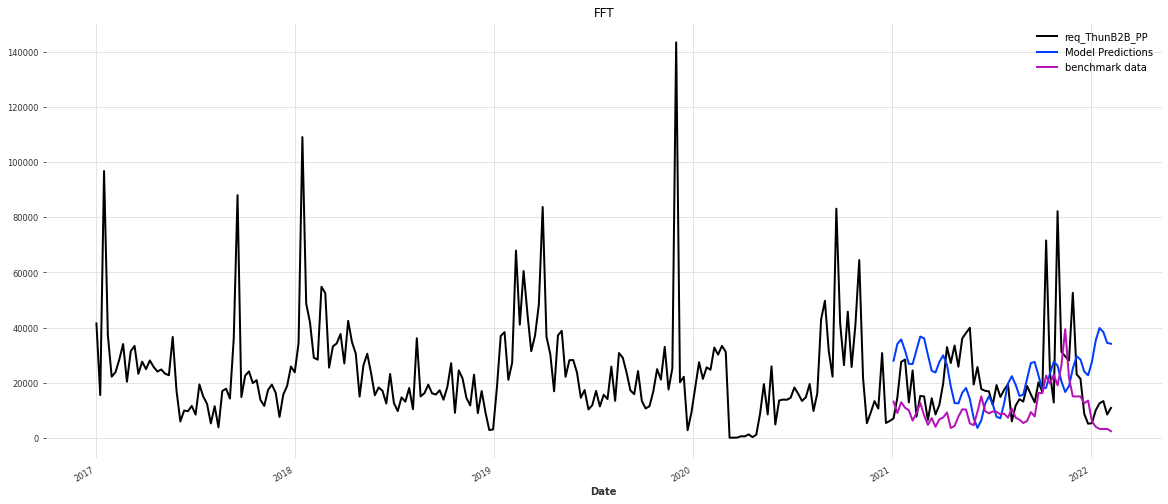

[2022-03-28 01:32:28,745] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
[2022-03-28 01:32:28,745] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 185 samples.
[2022-03-28 01:32:28,763] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 01:32:28,763] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type    | Params
--------------------------------------
0 | criterion | MSELoss | 0     
1 | rnn       | RNN     | 700   
2 | V         | Linear  

Running for : RNNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.rnn_model.RNNModel object at 0x000001918B394408>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 11758.01724137931
Model Predict Loss is : 20761.50929144575


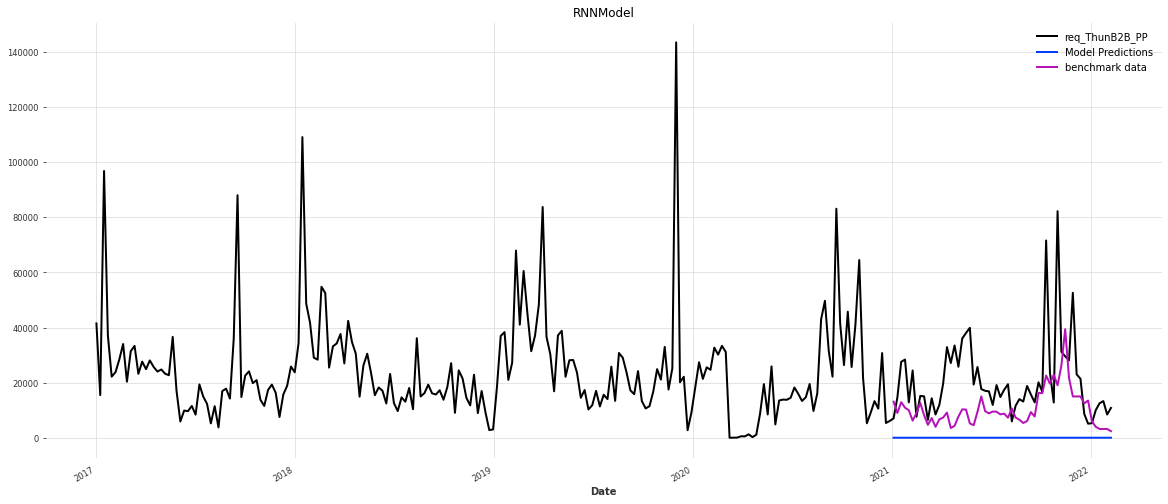

[2022-03-28 01:33:47,276] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-03-28 01:33:47,276] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-03-28 01:33:47,293] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
[2022-03-28 01:33:47,293] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
INFO:darts.models.forecasting.tcn_model:Number of layers chosen: 4
[2022-03-28 01:33:47,338] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 01:33:47,338] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available

Running for : TCNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.tcn_model.TCNModel object at 0x000001918B394908>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 11758.01724137931
Model Predict Loss is : 10853.613741655188


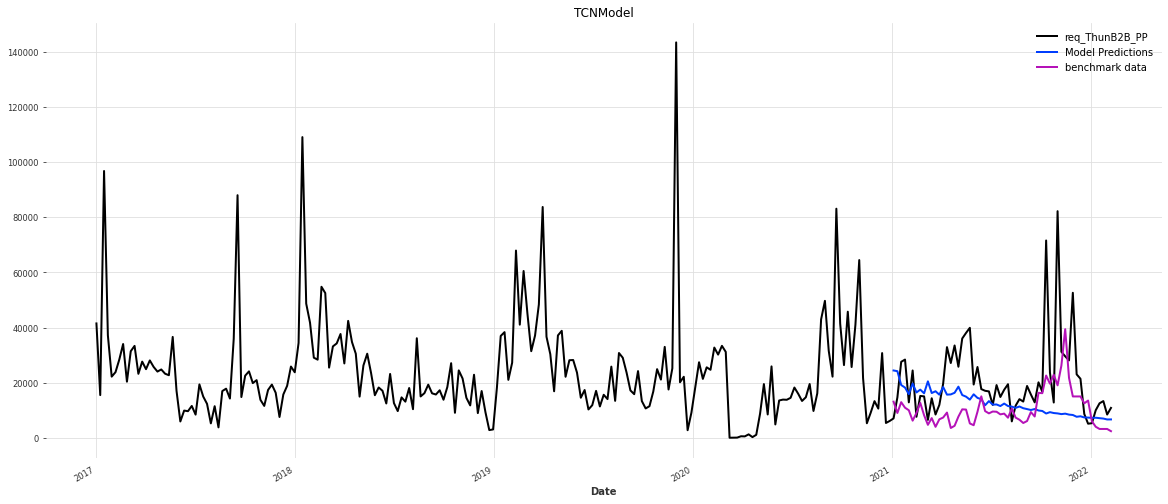

[2022-03-28 01:34:57,750] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-03-28 01:34:57,750] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.


Running for : NBEATSModel
Fitting the Model with Deafults Params : <darts.models.forecasting.nbeats.NBEATSModel object at 0x000001918B6953C8>


[2022-03-28 01:34:58,045] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 01:34:58,045] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type       | Params
-----------------------------------------
0 | criterion | MSELoss    | 0     
1 | stacks    | ModuleList | 6.3 M 
-----------------------------------------
6.3 M     Trainable params
1.5 K     Non-trainable params
6.3 M     Total params
50.072    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 11758.01724137931
Model Predict Loss is : 11906.146777718737


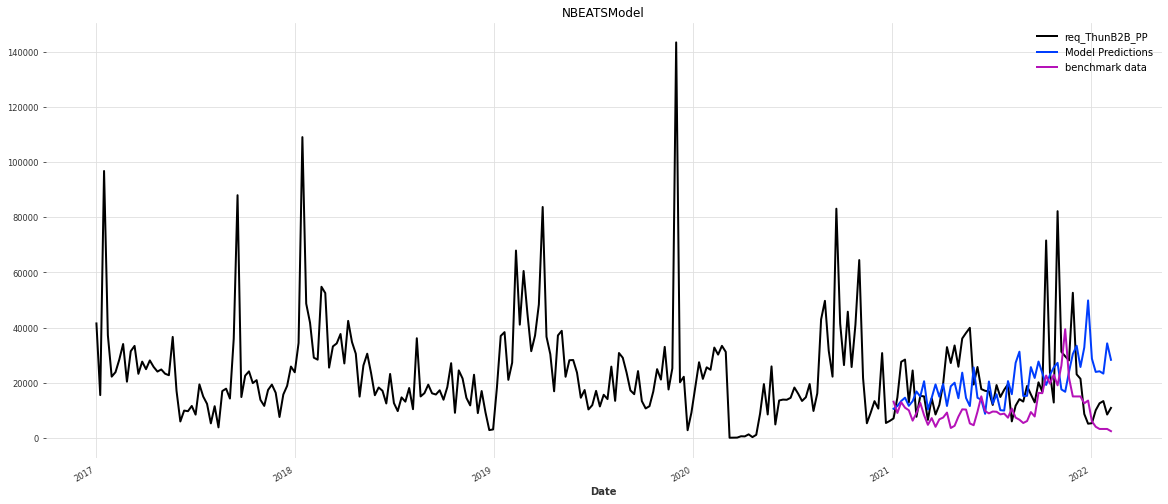

[2022-03-28 01:45:52,634] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-03-28 01:45:52,634] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-03-28 01:45:52,713] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 01:45:52,713] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             

Running for : TransformerModel
Fitting the Model with Deafults Params : <darts.models.forecasting.transformer_model.TransformerModel object at 0x00000191F90E7D48>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 11758.01724137931
Model Predict Loss is : 20589.896273974533


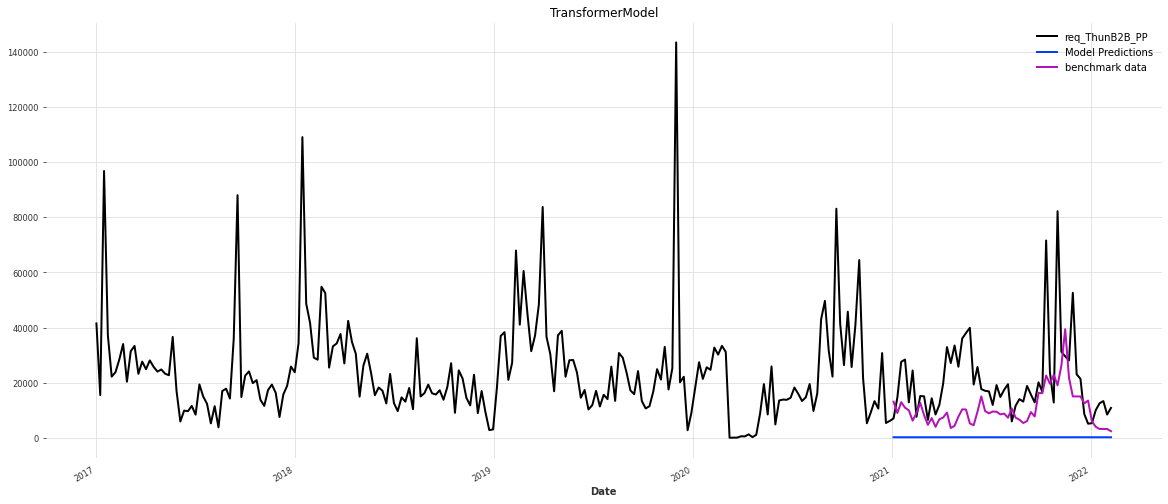

Running for  Sum_All_Variables
Call the training function
Running for : AutoARIMA
Fitting the Model with Deafults Params : Auto-ARIMA
Benchmark Loss is : 51986.81034482759
Model Predict Loss is : 60712.294836013505


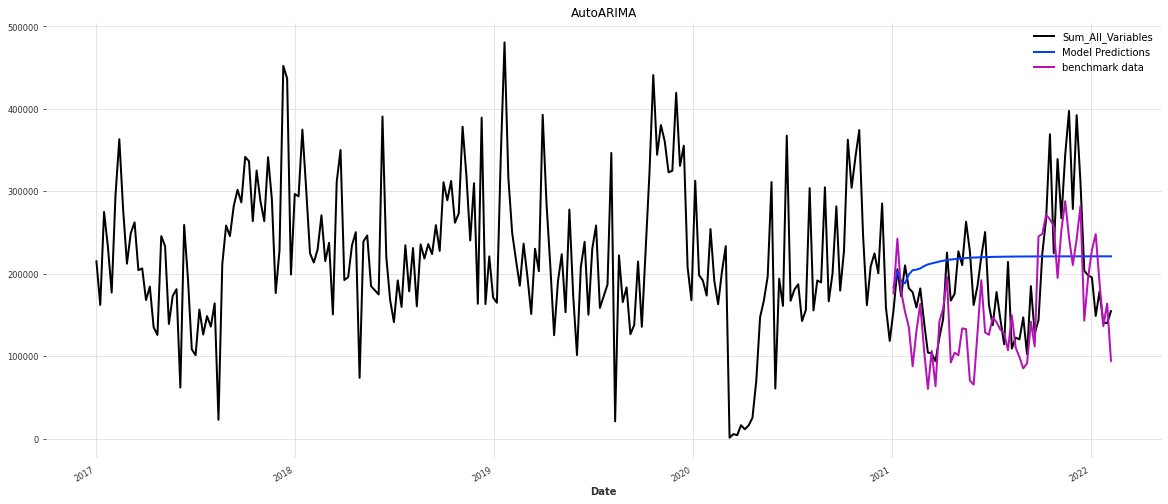

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Running for : Prophet
Fitting the Model with Deafults Params : Prophet
Benchmark Loss is : 51986.81034482759
Model Predict Loss is : 48835.94146380809


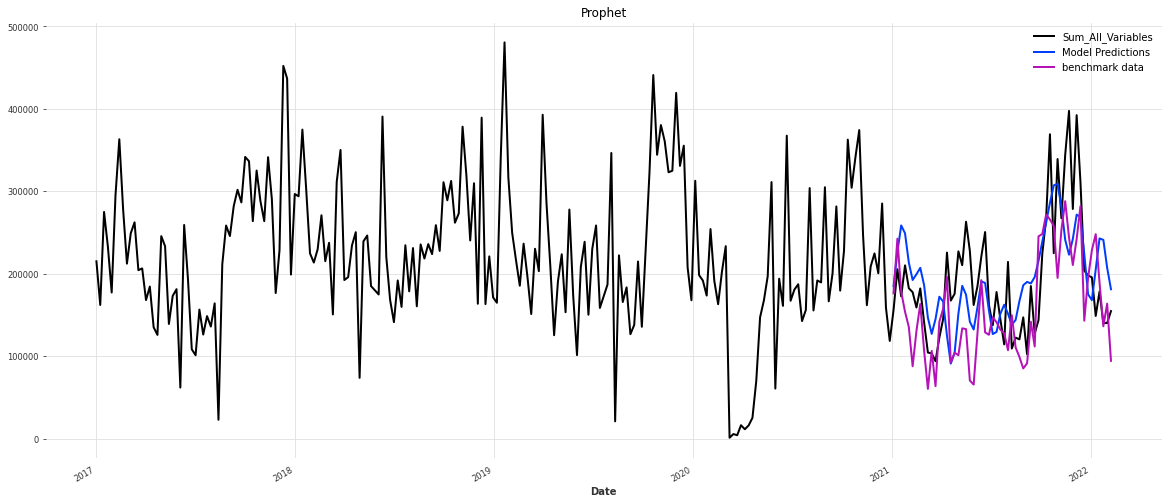

Running for : ExponentialSmoothing
Fitting the Model with Deafults Params : ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None


C:\Users\ashwini.kumar\source\repos\anaconda3\envs\practice\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


Benchmark Loss is : 51986.81034482759
Model Predict Loss is : 57125.80821513231


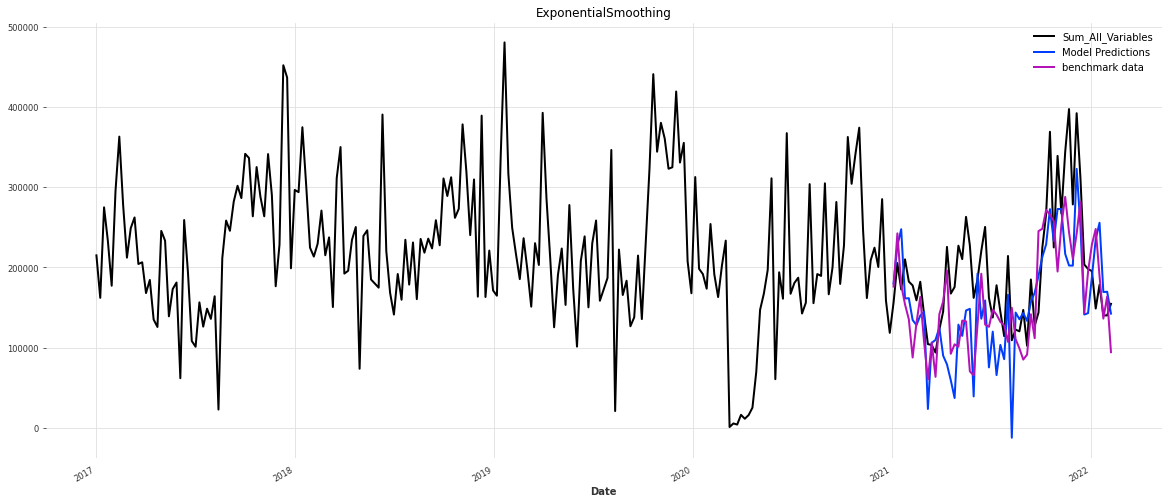

Running for : FFT
Fitting the Model with Deafults Params : FFT(nr_freqs_to_keep=10, trend=None)
Benchmark Loss is : 51986.81034482759
Model Predict Loss is : 68666.9234179342


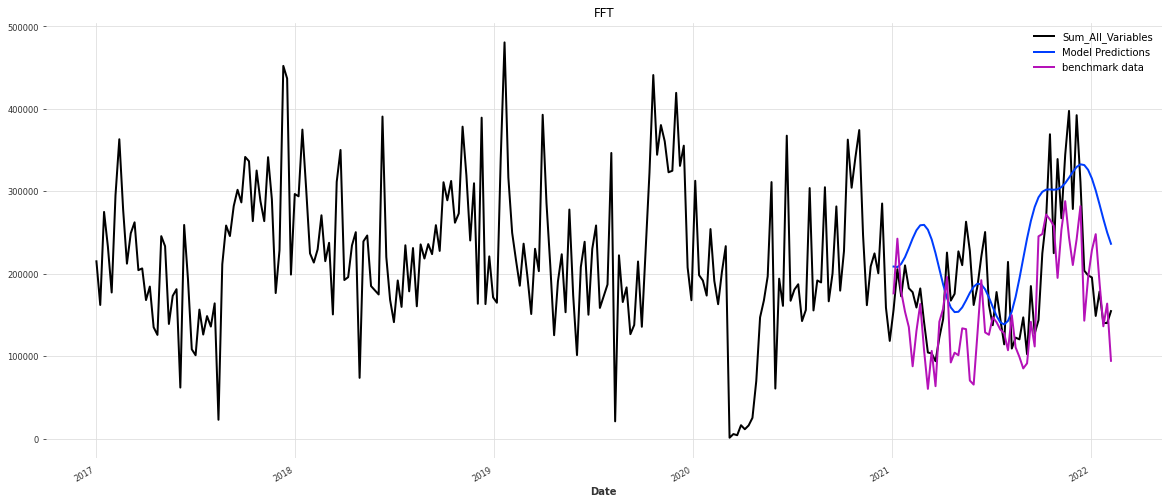

[2022-03-28 01:52:52,313] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
[2022-03-28 01:52:52,313] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 185 samples.
[2022-03-28 01:52:52,339] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 01:52:52,339] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type    | Params
--------------------------------------
0 | criterion | MSELoss | 0     
1 | rnn       | RNN     | 700   
2 | V         | Linear  

Running for : RNNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.rnn_model.RNNModel object at 0x000001918A6D1608>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 51986.81034482759
Model Predict Loss is : 193999.52892930535


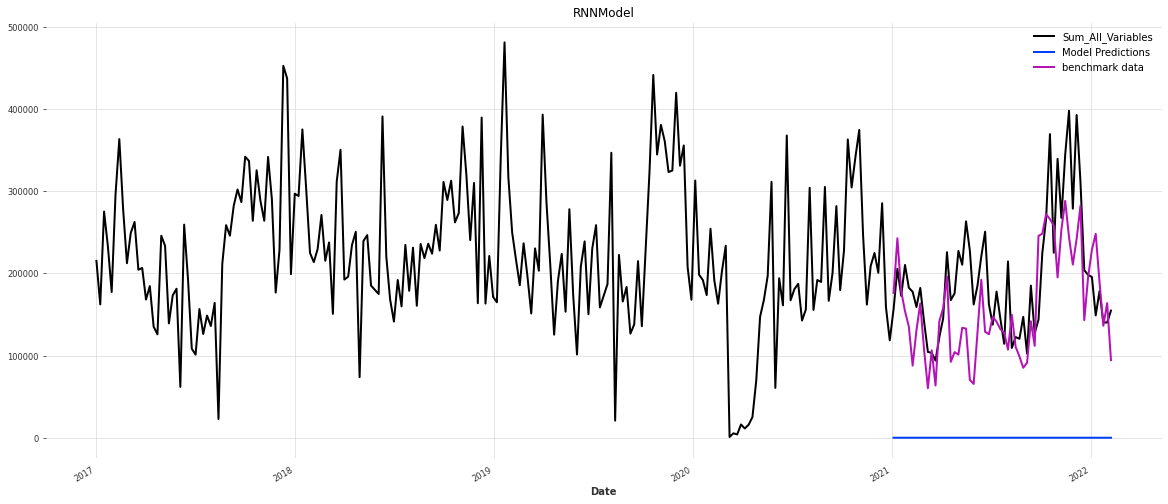

[2022-03-28 01:54:04,079] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-03-28 01:54:04,079] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-03-28 01:54:04,098] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
[2022-03-28 01:54:04,098] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
INFO:darts.models.forecasting.tcn_model:Number of layers chosen: 4
[2022-03-28 01:54:04,108] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 01:54:04,108] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available

Running for : TCNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.tcn_model.TCNModel object at 0x000001918BAB8088>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 51986.81034482759
Model Predict Loss is : 73403.42737127127


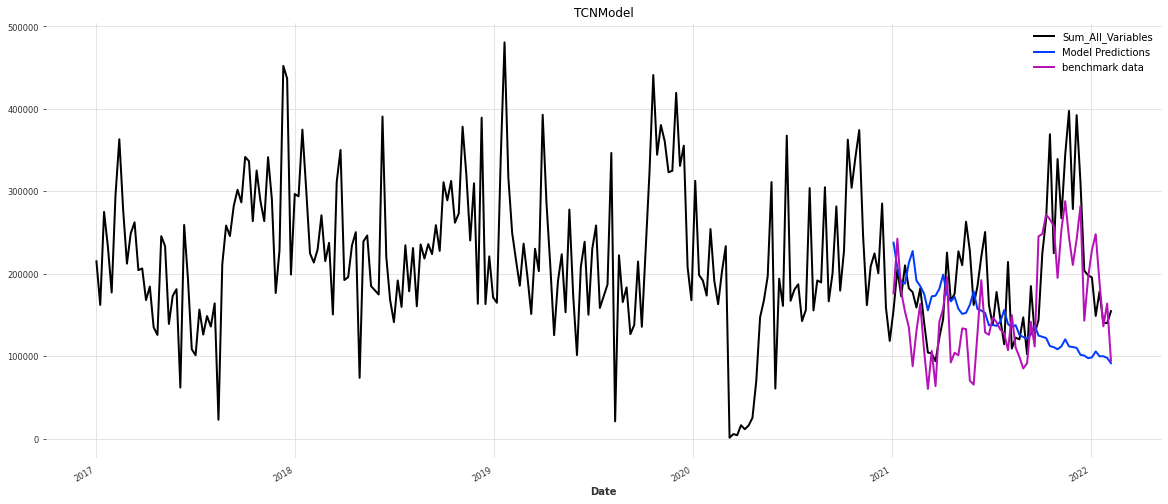

[2022-03-28 01:55:23,064] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-03-28 01:55:23,064] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.


Running for : NBEATSModel
Fitting the Model with Deafults Params : <darts.models.forecasting.nbeats.NBEATSModel object at 0x000001918A6D1EC8>


[2022-03-28 01:55:23,574] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 01:55:23,574] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type       | Params
-----------------------------------------
0 | criterion | MSELoss    | 0     
1 | stacks    | ModuleList | 6.3 M 
-----------------------------------------
6.3 M     Trainable params
1.5 K     Non-trainable params
6.3 M     Total params
50.072    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 51986.81034482759
Model Predict Loss is : 72589.8249798536


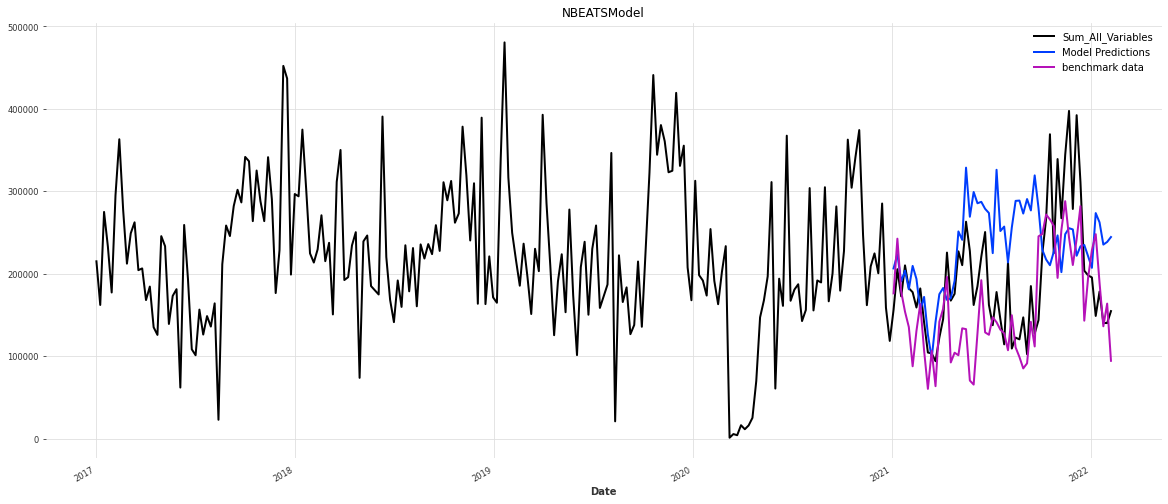

[2022-03-28 02:06:51,648] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-03-28 02:06:51,648] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-03-28 02:06:51,721] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 02:06:51,721] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             

Running for : TransformerModel
Fitting the Model with Deafults Params : <darts.models.forecasting.transformer_model.TransformerModel object at 0x000001918B23FB48>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 51986.81034482759
Model Predict Loss is : 193821.5422013797


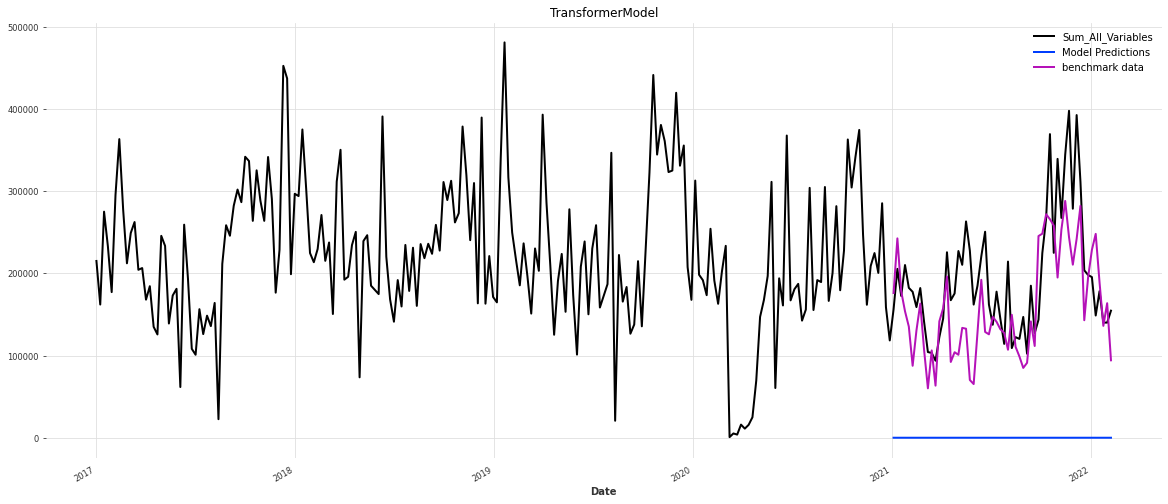

In [14]:
# Initialize the product details
import matplotlib.pyplot as plt
# Define the train function with Wandb Logging properly
def train(series_name):
    
    ## Create the directory  for our files
          try:
            os.makedirs("C:\\Users\\ashwini.kumar\\Time_Series_Modelling\\Outputs\\" + series_name)
          except OSError:
            pass
    
        # Define an empty Dataframe
          df = pd.DataFrame()
 # your model training code here
#           for num, model_type in enumerate([AutoARIMA(), Prophet()]):

#           for num,model_type in enumerate([ Prophet()]):

          for num,model_type in enumerate([AutoARIMA(), Prophet(), ExponentialSmoothing(),  FFT(),
                              RNNModel(input_chunk_length=32, output_chunk_length=8,n_epochs = 120, random_state = 0),
                              TCNModel(input_chunk_length=32, output_chunk_length=8,n_epochs = 120, random_state = 0),
                              NBEATSModel(input_chunk_length=32, output_chunk_length=8,n_epochs = 120, random_state = 0),
                              TransformerModel(input_chunk_length=32, output_chunk_length=8,n_epochs = 120, random_state = 0)
                           ]):
        
            list_model_names = ["AutoARIMA", "Prophet", "ExponentialSmoothing",  "FFT",
                              "RNNModel",
                              "TCNModel",
                              "NBEATSModel",
                              "TransformerModel"]
            
            print ("Running for :",list_model_names[num])
#             print (str(model_type))
            model = model_type
            print ("Fitting the Model with Deafults Params :",model_type)
            # Fit the model on training data 
            model_req = model.fit(train_data)
            #Make the prediction for 58 observation on train Data
            pred_air = model_req.predict(n = 58)
            
#             print (pred_air)
            # Predict the data for Backtesting
#             if num <= 4:
#                 pred_backtest = model.historical_forecasts(timeseries_input,
#                   start=pd.Timestamp("2020-12-28"),  forecast_horizon=4)
#             else:
#                 pred_backtest = model.historical_forecasts(timeseries_input,
#                   start=pd.Timestamp("2020-12-28"),  forecast_horizon=8, retrain=False)
#             print (pred_backtest)
#             print (len(pred_backtest))
            # Calculate the loss off model
            loss_model = mae(val_data , pred_air)
            #Calculate the loss of bencmark model
            loss_benchmark = mae(val_data, benchmark_data)
            # Calculate the loss off backtesting
#             loss_backtesting = mae(val_data,pred_backtest)
            # Print the loss function for benchmark data
            print ("Benchmark Loss is :", loss_benchmark) 
            # Print the loss function for benchmark data
            print ("Model Predict Loss is :", loss_model)      
            # Print the loss function for benchmark data
#             print ("Model Backtest Loss is :", loss_backtesting)  
            ## Add values to Dataframe
            df.loc[num, 'model'] = model_type
            df.loc[num,'loss_benchmark'] = loss_benchmark
#             df.loc[num,'loss_backtesting'] = loss_backtesting
            df.loc[num,'loss_model'] = loss_model
            # Initialize the plotting variables
            
            df.to_csv("C:\\Users\\ashwini.kumar\\Time_Series_Modelling\\Outputs\\" + series_name+"/valid_data.csv")
            plt.figure() 
            # Set the image size
            plt.rcParams["figure.figsize"] = (20,8)
            # Plot the actual time series data
            timeseries_input.plot()
            # Plot the prediction made
            pred_air.plot(label='Model Predictions', low_quantile=0.05, high_quantile=0.95)
            benchmark_data.plot(label='benchmark data', low_quantile=0.05, high_quantile=0.95)
#             pred_backtest.plot(label='Backtesting Predictions', low_quantile=0.05, high_quantile=0.95)
            plt.legend()
            plt.title(list_model_names[num])
            
            plt.savefig("C:\\Users\\ashwini.kumar\\Time_Series_Modelling\\Outputs\\" + series_name + "/" + str(list_model_names[num]) + '.png')
            plt.show()

         


# The function to define the train_data input data and other functions
def call_timeseries(train_column,benchmark_column):
    timeseries_input = df_to_timeseries(df,"Date",train_column)

    benchmark_input = df_to_timeseries(df,"Date",benchmark_column)
    # Set aside the data since 2021 
    train_data, val_data = timeseries_input.split_before(pd.Timestamp('2021-01-04'))

    train_benchmark_ignore, benchmark_data = benchmark_input.split_before(pd.Timestamp('2021-01-04'))
    
    return train_data,val_data,benchmark_data,timeseries_input


train_series = ["req_ThunB2B_Sorter", "req_ThunB2C","req_ThunB2B_AA", "req_ThunB2B_PP",'Sum_All_Variables' ]
benchmark_series = ["BOL_B2B Sorter Thun", "BOL_B2C Thun","BOL_B2B AA Thun", "BOL_B2B P&P Thun",'Sum_All_Variables_Benchmark']




for i in range(len(train_series)):
    
    print ("Running for " , train_series[i])
    train_data,val_data,benchmark_data,timeseries_input = call_timeseries(train_series[i],benchmark_series[i])
    print ("Call the training function")
    train(train_series[i])

## Run on Filtered Data

Running for  req_ThunB2B_Sorter


C:\Users\ashwini.kumar\source\repos\anaconda3\envs\practice\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Call the training function
Running for : AutoARIMA
Fitting the Model with Deafults Params : Auto-ARIMA
Benchmark Loss is : 33980.206896551725
Model Predict Loss is : 42029.427153312216


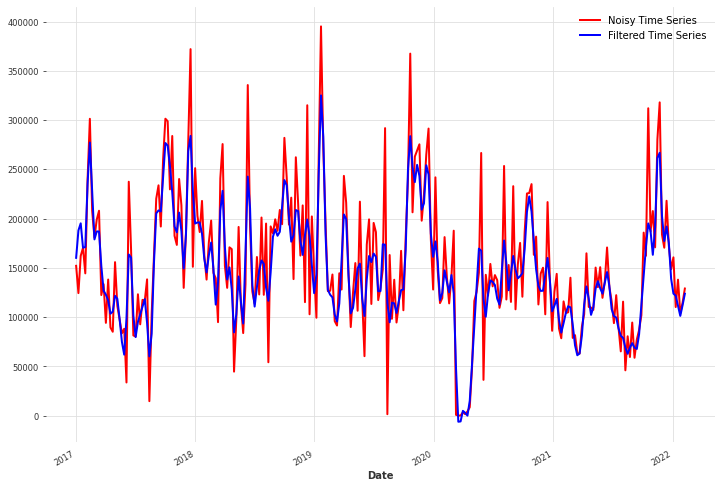

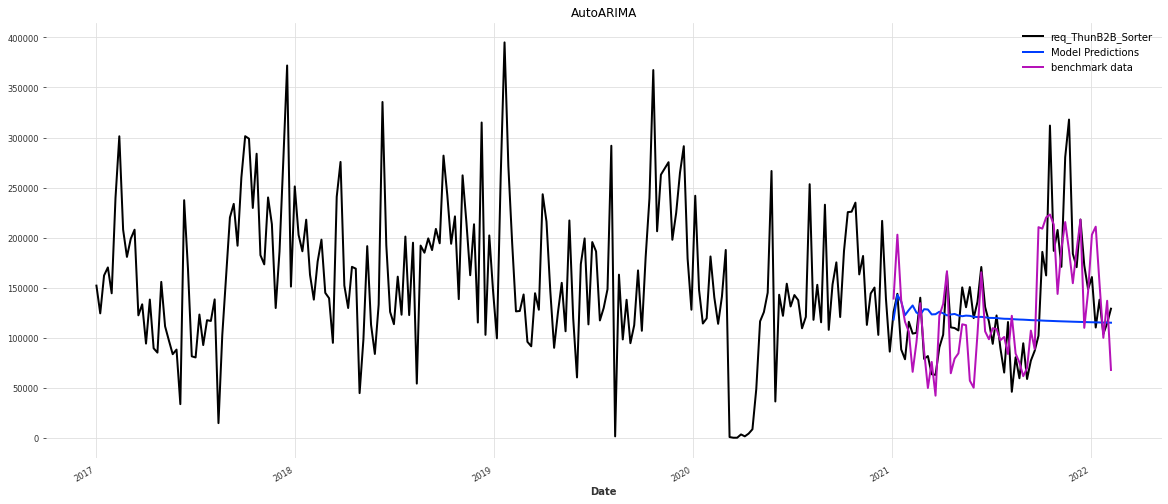

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Running for : Prophet
Fitting the Model with Deafults Params : Prophet
Benchmark Loss is : 33980.206896551725
Model Predict Loss is : 36445.21271116231


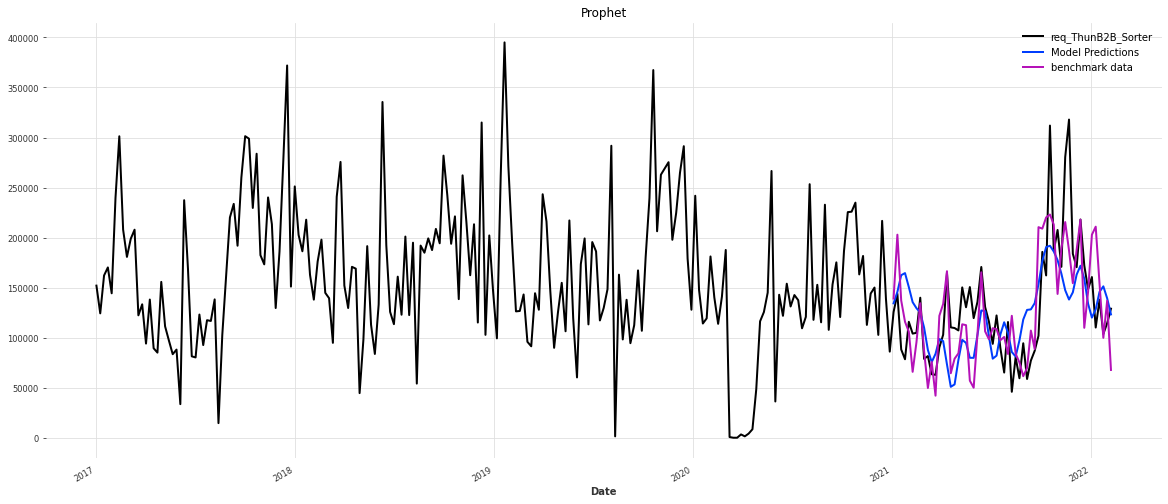

Running for : ExponentialSmoothing
Fitting the Model with Deafults Params : ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None


C:\Users\ashwini.kumar\source\repos\anaconda3\envs\practice\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


Benchmark Loss is : 33980.206896551725
Model Predict Loss is : 54038.06684053966


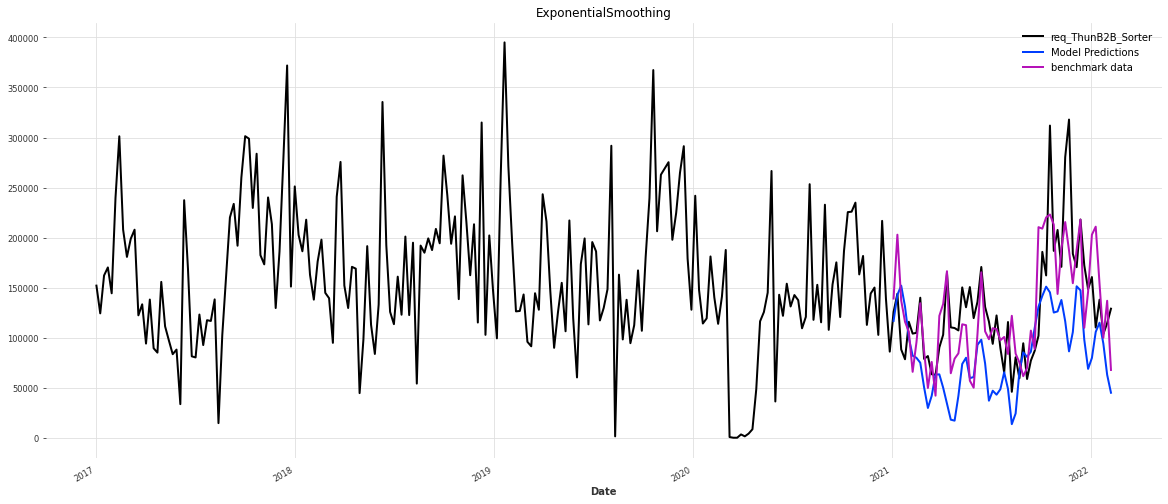

Running for : FFT
Fitting the Model with Deafults Params : FFT(nr_freqs_to_keep=10, trend=None)
Benchmark Loss is : 33980.206896551725
Model Predict Loss is : 56778.82909119326


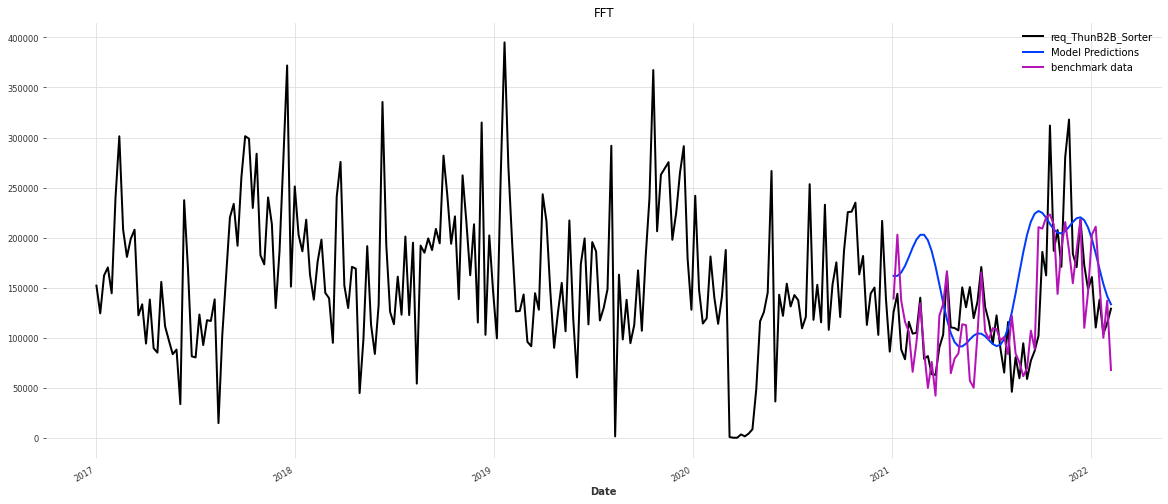

[2022-03-28 02:27:43,584] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
[2022-03-28 02:27:43,584] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 185 samples.
[2022-03-28 02:27:43,593] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 02:27:43,593] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type    | Params
--------------------------------------
0 | criterion | MSELoss | 0     
1 | rnn       | RNN     | 700   
2 | V         | Linear  

Running for : RNNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.rnn_model.RNNModel object at 0x000001919B7BD9C8>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 33980.206896551725
Model Predict Loss is : 130114.62857083051


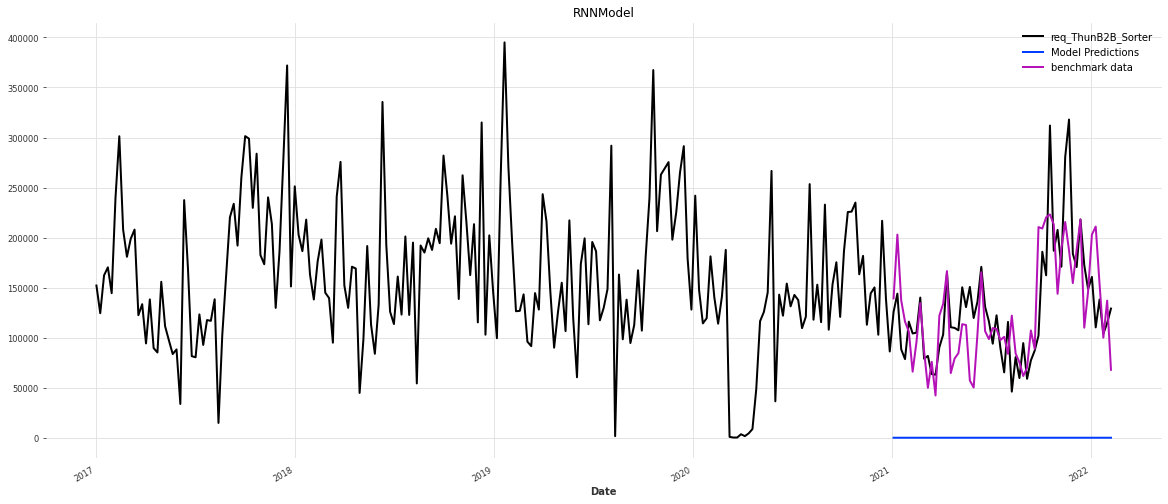

[2022-03-28 02:28:09,937] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-03-28 02:28:09,937] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-03-28 02:28:09,945] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
[2022-03-28 02:28:09,945] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
INFO:darts.models.forecasting.tcn_model:Number of layers chosen: 4
[2022-03-28 02:28:09,954] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 02:28:09,954] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available

Running for : TCNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.tcn_model.TCNModel object at 0x000001918B223C08>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 33980.206896551725
Model Predict Loss is : 50609.71284165996


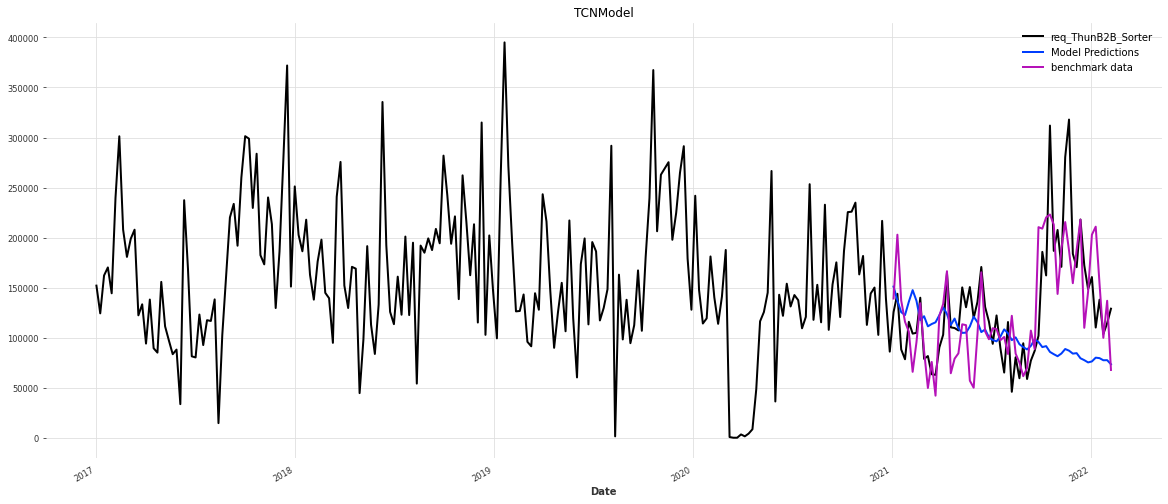

[2022-03-28 02:28:34,846] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-03-28 02:28:34,846] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-03-28 02:28:35,007] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 02:28:35,007] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Running for : NBEATSModel
Fitting the Model with Deafults Params : <darts.models.forecasting.nbeats.NBEATSModel object at 0x000001918B223F88>



  | Name      | Type       | Params
-----------------------------------------
0 | criterion | MSELoss    | 0     
1 | stacks    | ModuleList | 6.3 M 
-----------------------------------------
6.3 M     Trainable params
1.5 K     Non-trainable params
6.3 M     Total params
50.072    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 33980.206896551725
Model Predict Loss is : 44334.341816570406


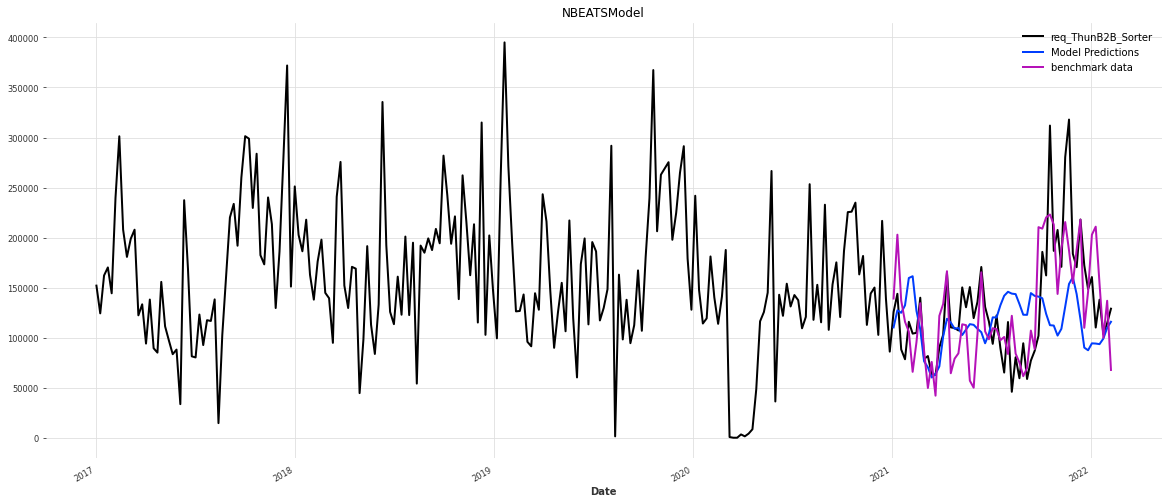

[2022-03-28 02:32:21,950] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-03-28 02:32:21,950] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-03-28 02:32:21,992] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 02:32:21,992] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             

Running for : TransformerModel
Fitting the Model with Deafults Params : <darts.models.forecasting.transformer_model.TransformerModel object at 0x000001918B29A588>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 33980.206896551725
Model Predict Loss is : 129939.83803407525


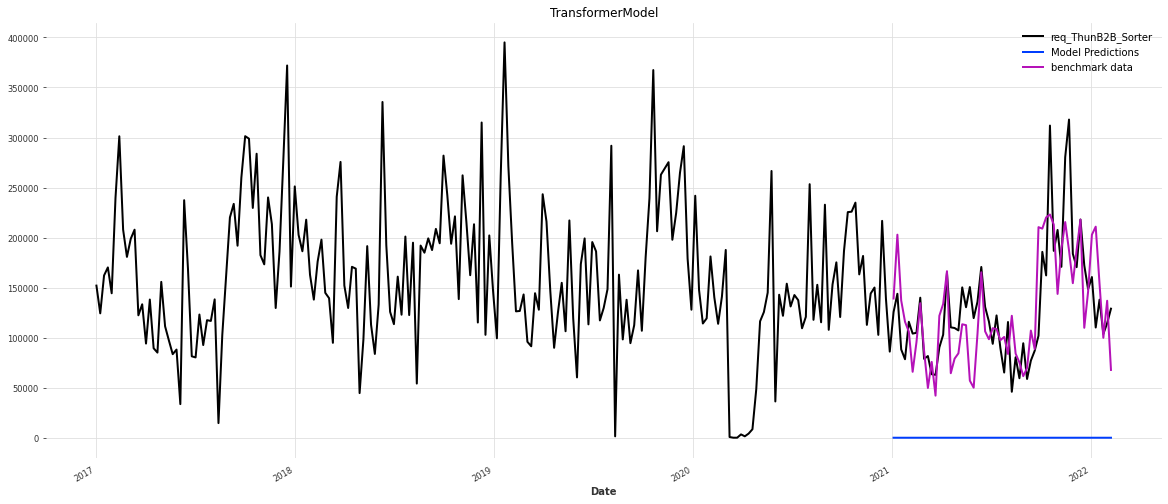

Running for  req_ThunB2C


C:\Users\ashwini.kumar\source\repos\anaconda3\envs\practice\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Call the training function
Running for : AutoARIMA
Fitting the Model with Deafults Params : Auto-ARIMA
Benchmark Loss is : 4774.6551724137935
Model Predict Loss is : 7978.009848125828


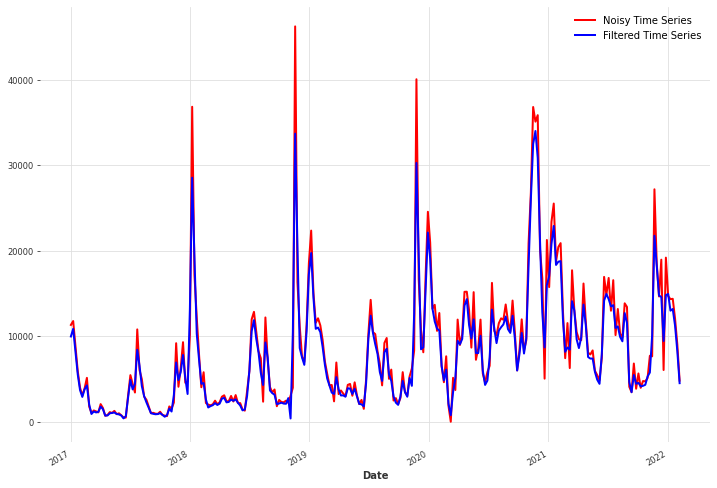

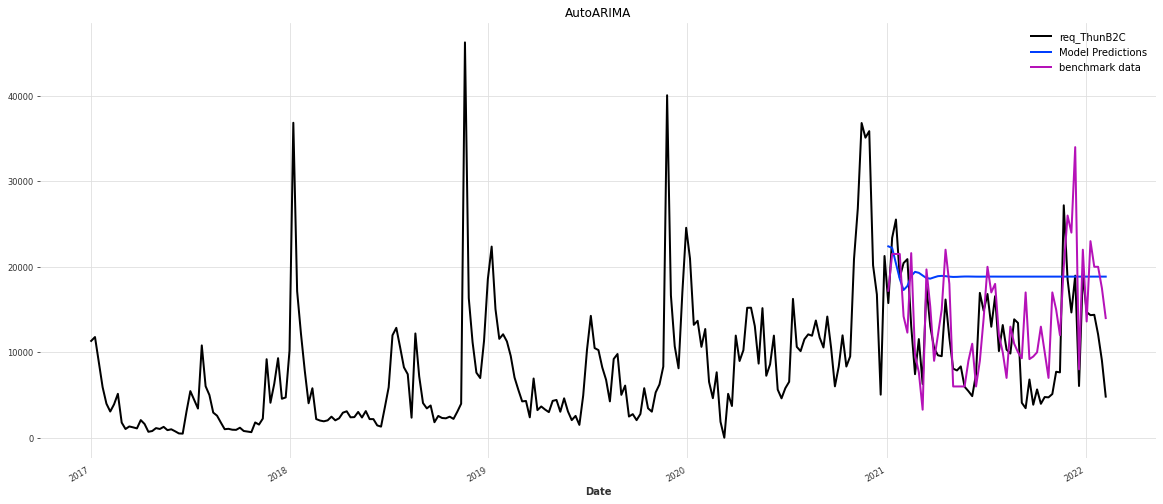

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Running for : Prophet
Fitting the Model with Deafults Params : Prophet
Benchmark Loss is : 4774.6551724137935
Model Predict Loss is : 6237.938528077047


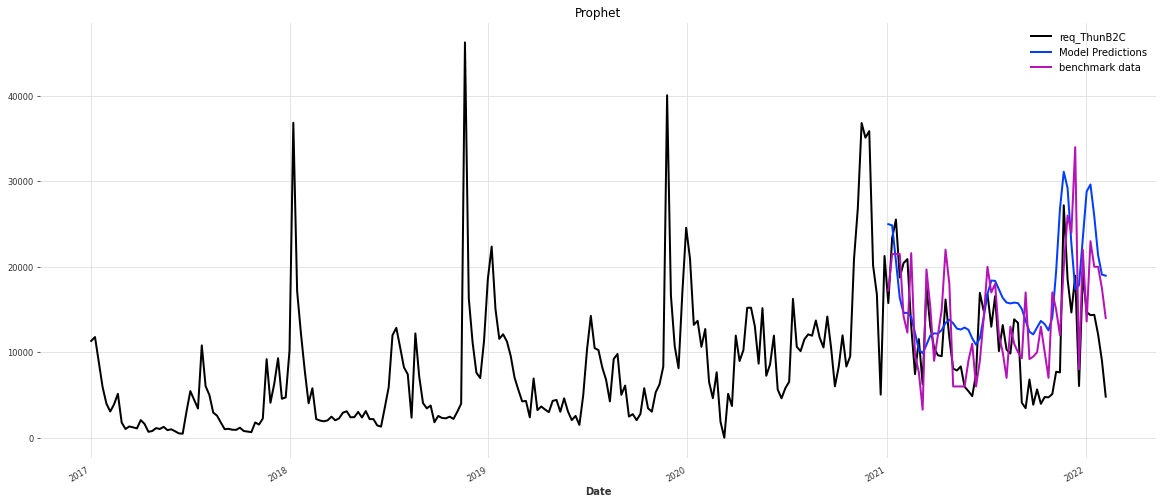

Running for : ExponentialSmoothing
Fitting the Model with Deafults Params : ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None
Benchmark Loss is : 4774.6551724137935
Model Predict Loss is : 5566.722158956771


C:\Users\ashwini.kumar\source\repos\anaconda3\envs\practice\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


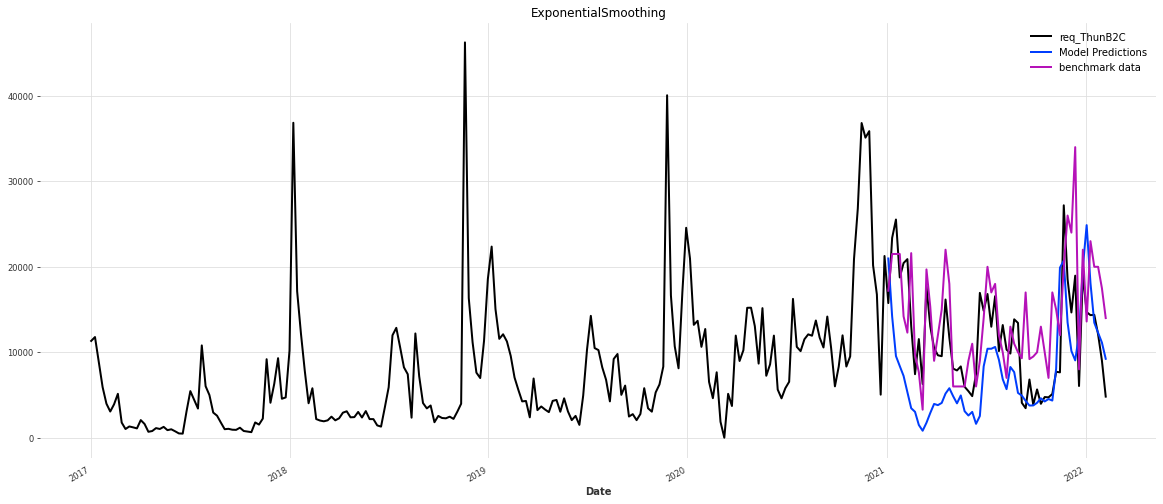

Running for : FFT
Fitting the Model with Deafults Params : FFT(nr_freqs_to_keep=10, trend=None)
Benchmark Loss is : 4774.6551724137935
Model Predict Loss is : 7193.588999007035


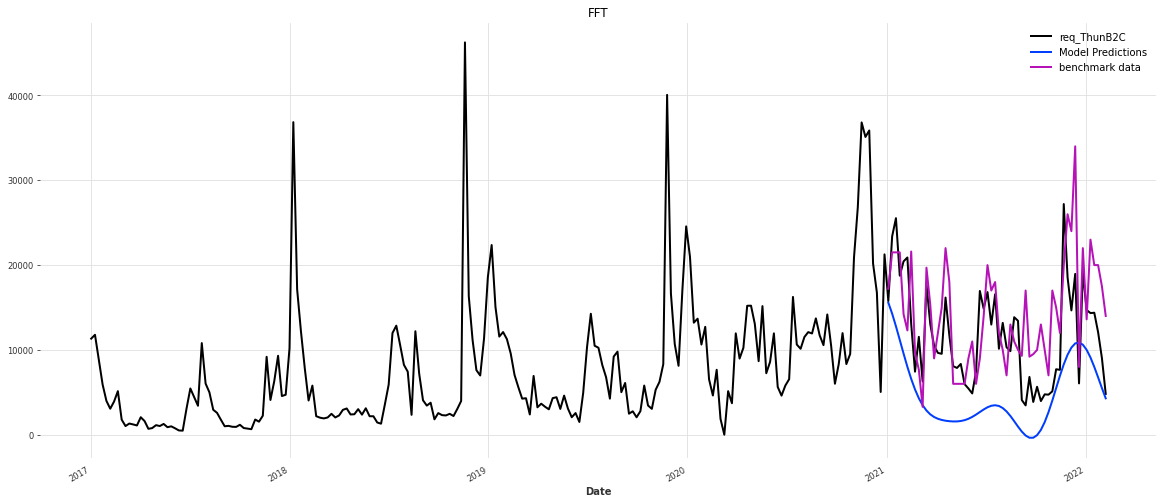

[2022-03-28 02:35:02,886] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
[2022-03-28 02:35:02,886] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 185 samples.
[2022-03-28 02:35:02,895] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 02:35:02,895] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type    | Params
--------------------------------------
0 | criterion | MSELoss | 0     
1 | rnn       | RNN     | 700   
2 | V         | Linear  

Running for : RNNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.rnn_model.RNNModel object at 0x000001918BA2A608>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 4774.6551724137935
Model Predict Loss is : 11709.781747410196


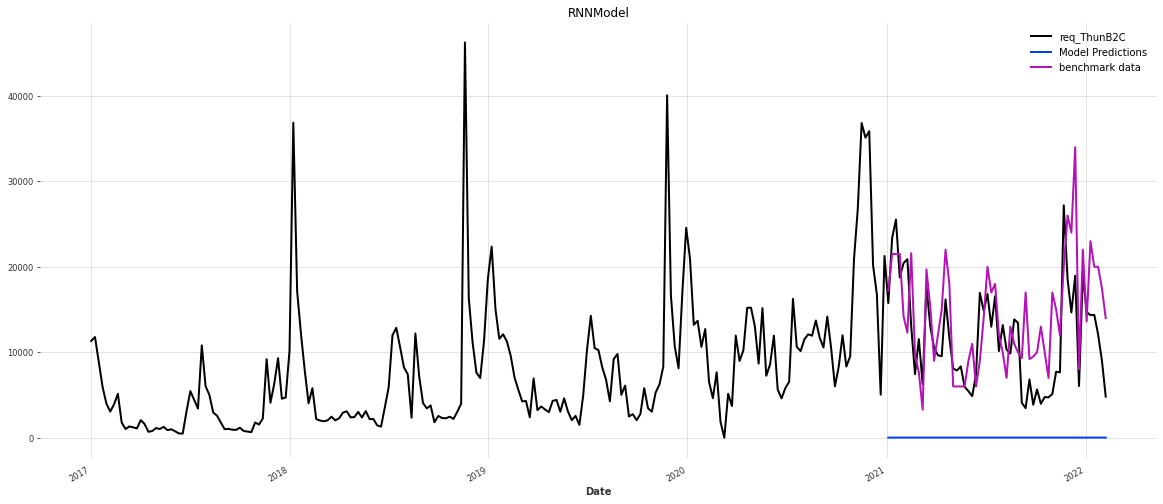

[2022-03-28 02:35:23,486] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-03-28 02:35:23,486] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-03-28 02:35:23,493] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
[2022-03-28 02:35:23,493] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
INFO:darts.models.forecasting.tcn_model:Number of layers chosen: 4
[2022-03-28 02:35:23,500] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 02:35:23,500] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available

Running for : TCNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.tcn_model.TCNModel object at 0x000001918BA2AF88>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 4774.6551724137935
Model Predict Loss is : 7361.270149798032


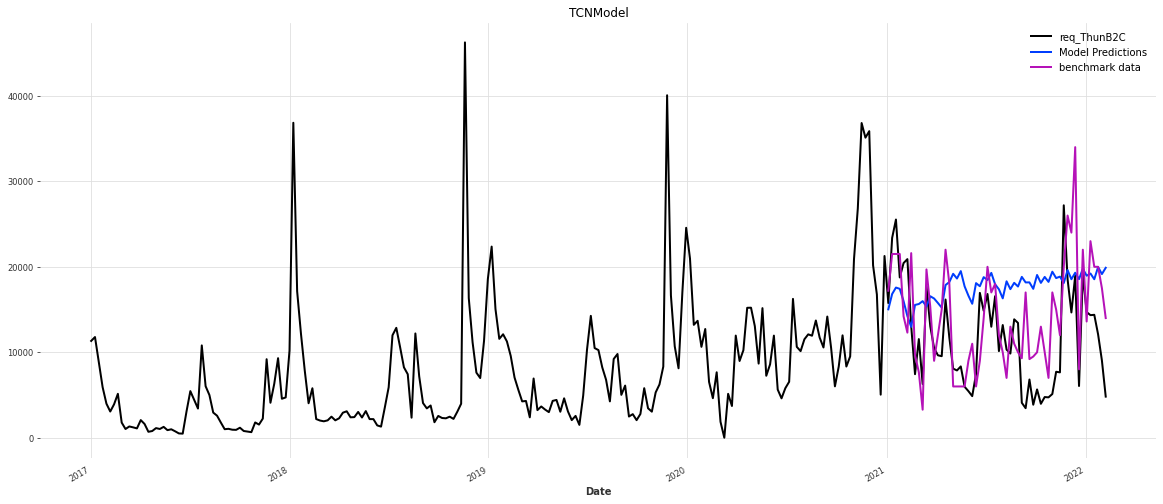

[2022-03-28 02:35:43,425] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-03-28 02:35:43,425] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-03-28 02:35:43,524] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 02:35:43,524] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Running for : NBEATSModel
Fitting the Model with Deafults Params : <darts.models.forecasting.nbeats.NBEATSModel object at 0x000001918B8823C8>



  | Name      | Type       | Params
-----------------------------------------
0 | criterion | MSELoss    | 0     
1 | stacks    | ModuleList | 6.3 M 
-----------------------------------------
6.3 M     Trainable params
1.5 K     Non-trainable params
6.3 M     Total params
50.072    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 4774.6551724137935
Model Predict Loss is : 20182.05707767844


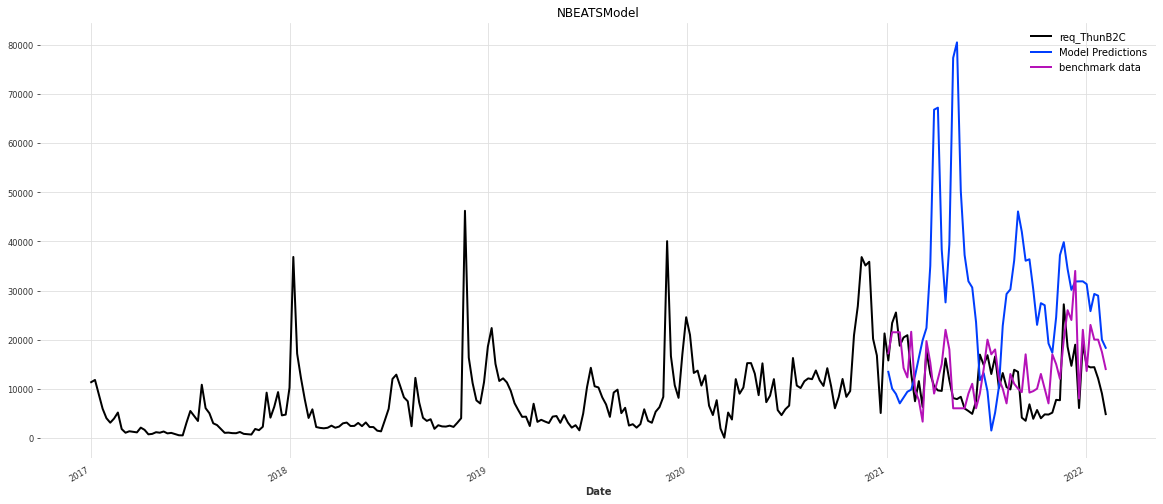

[2022-03-28 02:38:37,617] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-03-28 02:38:37,617] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-03-28 02:38:37,649] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 02:38:37,649] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             

Running for : TransformerModel
Fitting the Model with Deafults Params : <darts.models.forecasting.transformer_model.TransformerModel object at 0x000001918BA3A948>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 4774.6551724137935
Model Predict Loss is : 11537.441907787983


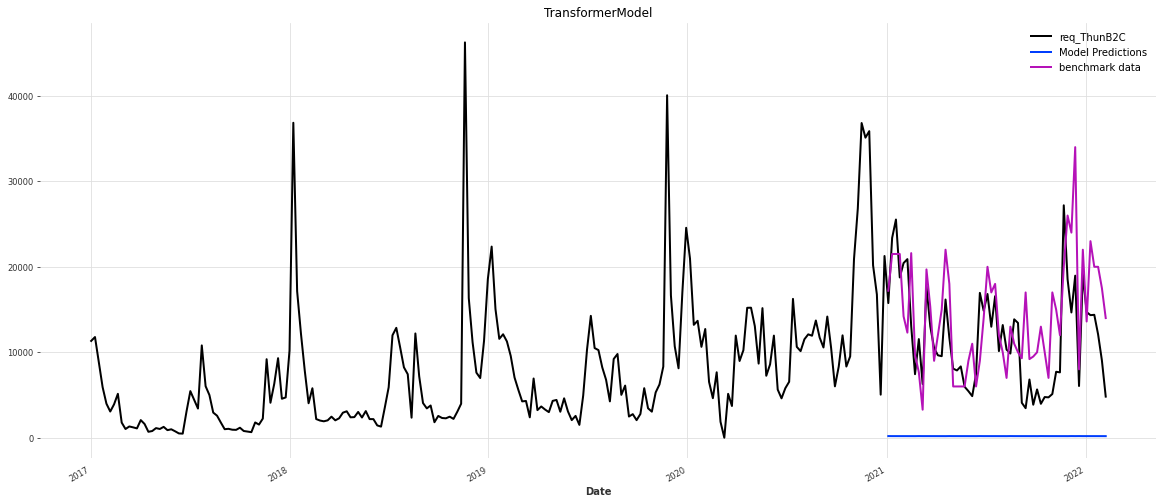

Running for  req_ThunB2B_AA


C:\Users\ashwini.kumar\source\repos\anaconda3\envs\practice\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Call the training function
Running for : AutoARIMA
Fitting the Model with Deafults Params : Auto-ARIMA
Benchmark Loss is : 23509.689655172413
Model Predict Loss is : 17019.090530887854


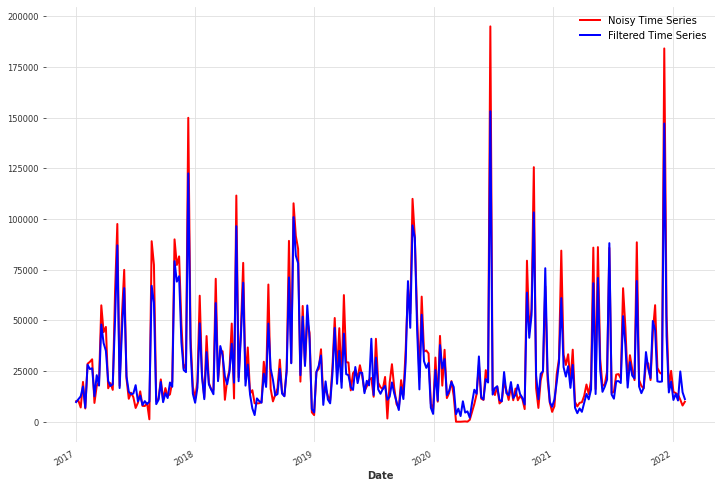

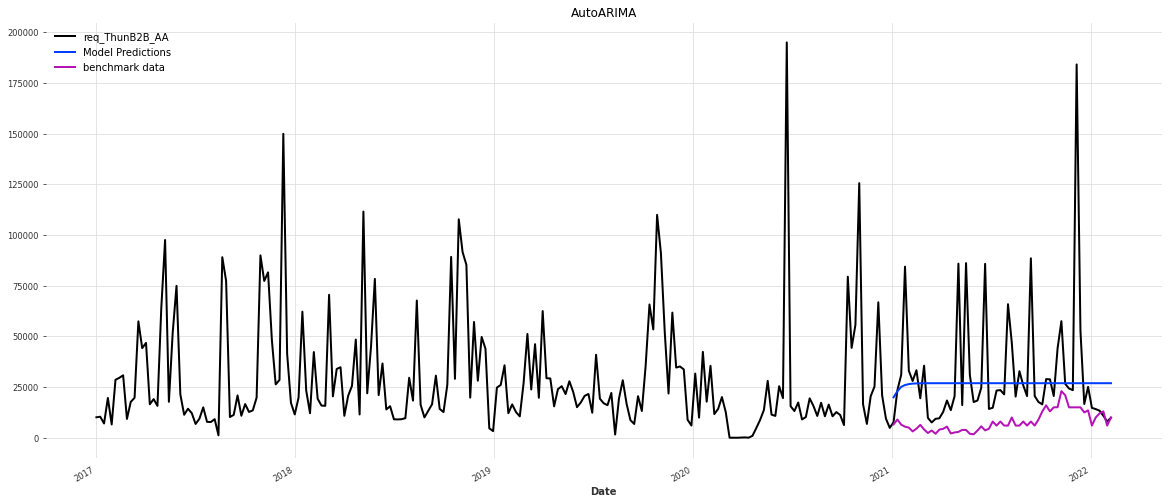

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Running for : Prophet
Fitting the Model with Deafults Params : Prophet
Benchmark Loss is : 23509.689655172413
Model Predict Loss is : 18055.118661955566


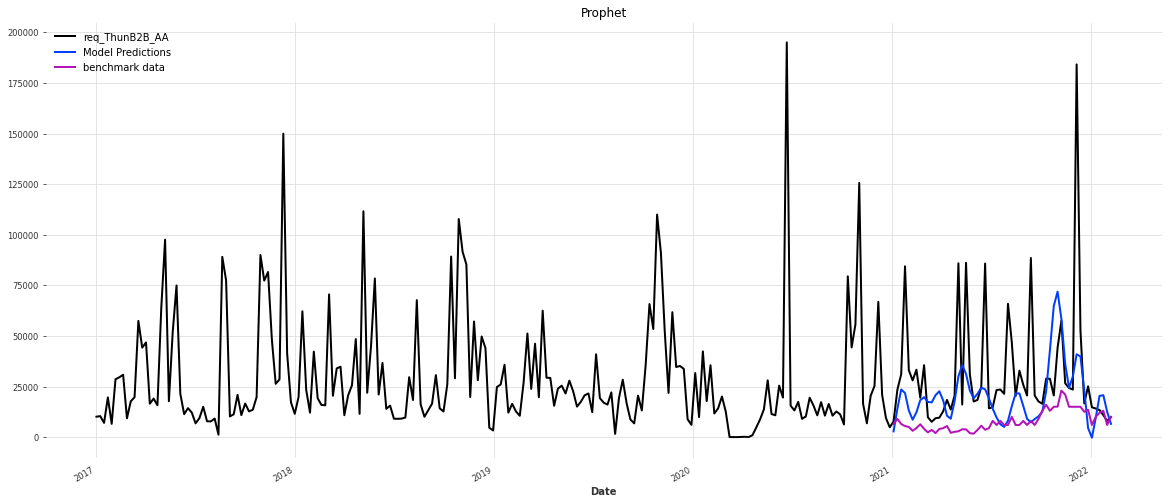

Running for : ExponentialSmoothing
Fitting the Model with Deafults Params : ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None


C:\Users\ashwini.kumar\source\repos\anaconda3\envs\practice\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


Benchmark Loss is : 23509.689655172413
Model Predict Loss is : 18105.245648848086


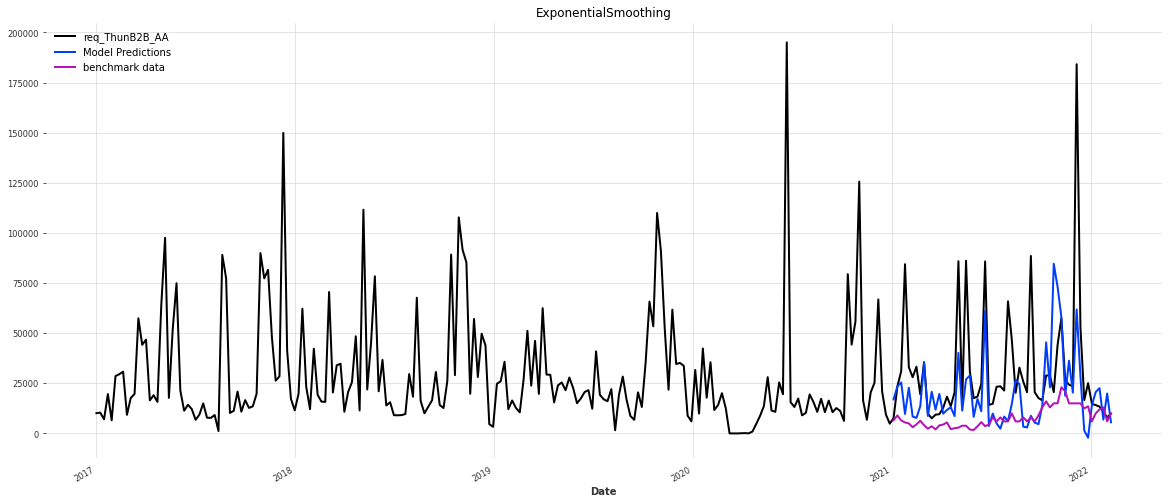

Running for : FFT
Fitting the Model with Deafults Params : FFT(nr_freqs_to_keep=10, trend=None)
Benchmark Loss is : 23509.689655172413
Model Predict Loss is : 16338.925963466936


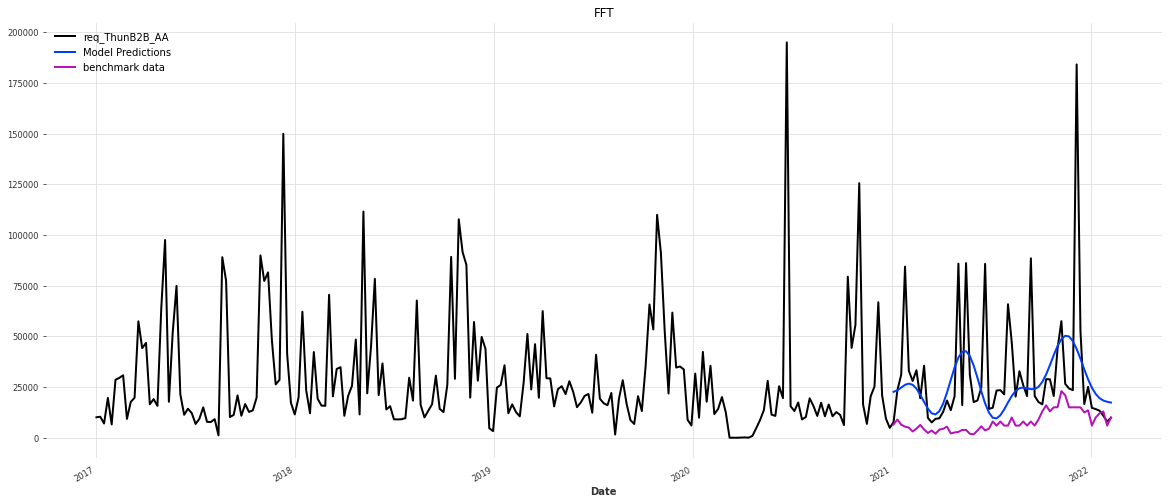

[2022-03-28 02:41:13,156] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
[2022-03-28 02:41:13,156] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 185 samples.
[2022-03-28 02:41:13,158] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 02:41:13,158] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type    | Params
--------------------------------------
0 | criterion | MSELoss | 0     
1 | rnn       | RNN     | 700   
2 | V         | Linear  

Running for : RNNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.rnn_model.RNNModel object at 0x000001918B809DC8>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 23509.689655172413
Model Predict Loss is : 31357.67706442093


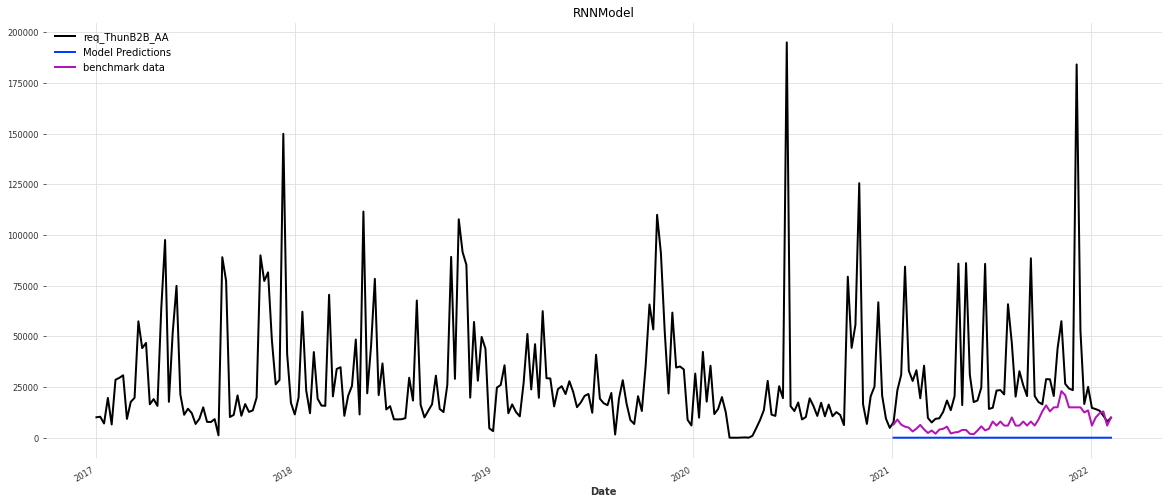

[2022-03-28 02:41:32,149] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-03-28 02:41:32,149] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-03-28 02:41:32,154] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
[2022-03-28 02:41:32,154] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
INFO:darts.models.forecasting.tcn_model:Number of layers chosen: 4
[2022-03-28 02:41:32,159] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 02:41:32,159] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available

Running for : TCNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.tcn_model.TCNModel object at 0x000001918B6F6108>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 23509.689655172413
Model Predict Loss is : 17198.866419768907


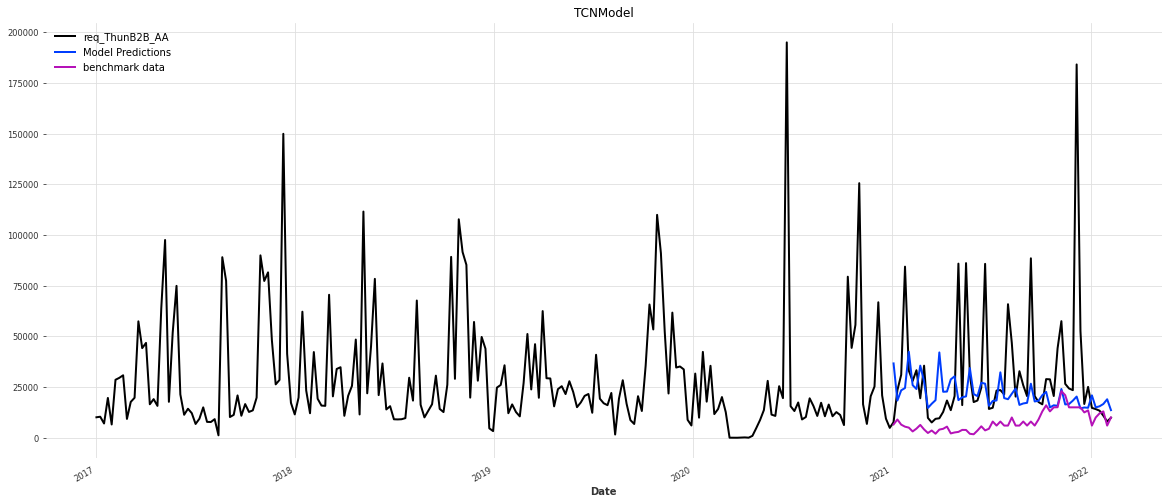

[2022-03-28 02:41:51,376] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-03-28 02:41:51,376] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-03-28 02:41:51,498] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 02:41:51,498] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type       | Params
-----------------------------------------
0 | criterion | MSELoss    | 0     
1 | stacks    | ModuleList | 6.3 M 
------------

Running for : NBEATSModel
Fitting the Model with Deafults Params : <darts.models.forecasting.nbeats.NBEATSModel object at 0x000001918B6F6508>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 23509.689655172413
Model Predict Loss is : 16887.29363267593


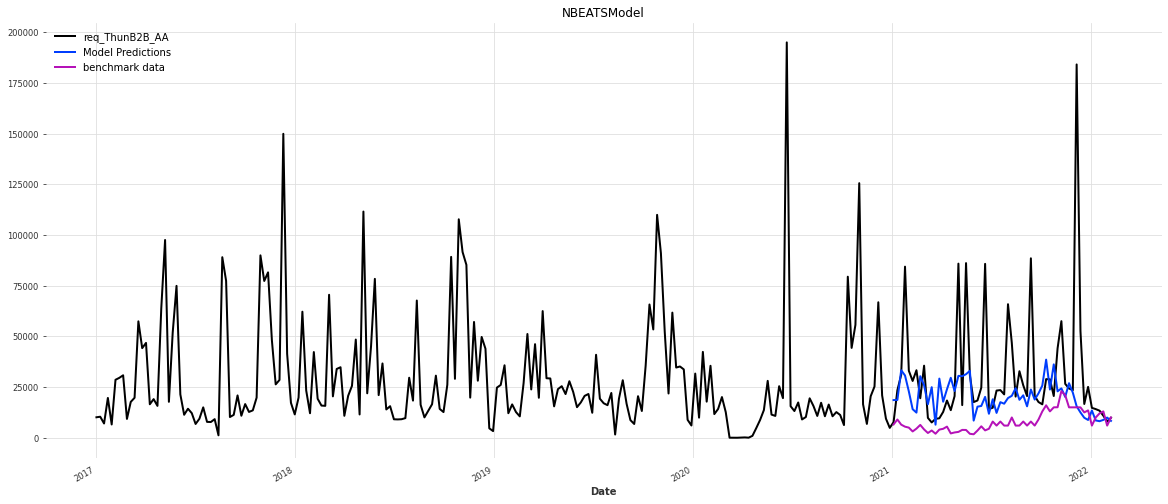

[2022-03-28 02:44:33,003] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-03-28 02:44:33,003] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-03-28 02:44:33,026] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 02:44:33,026] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             

Running for : TransformerModel
Fitting the Model with Deafults Params : <darts.models.forecasting.transformer_model.TransformerModel object at 0x000001918B818608>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 23509.689655172413
Model Predict Loss is : 31182.736424960392


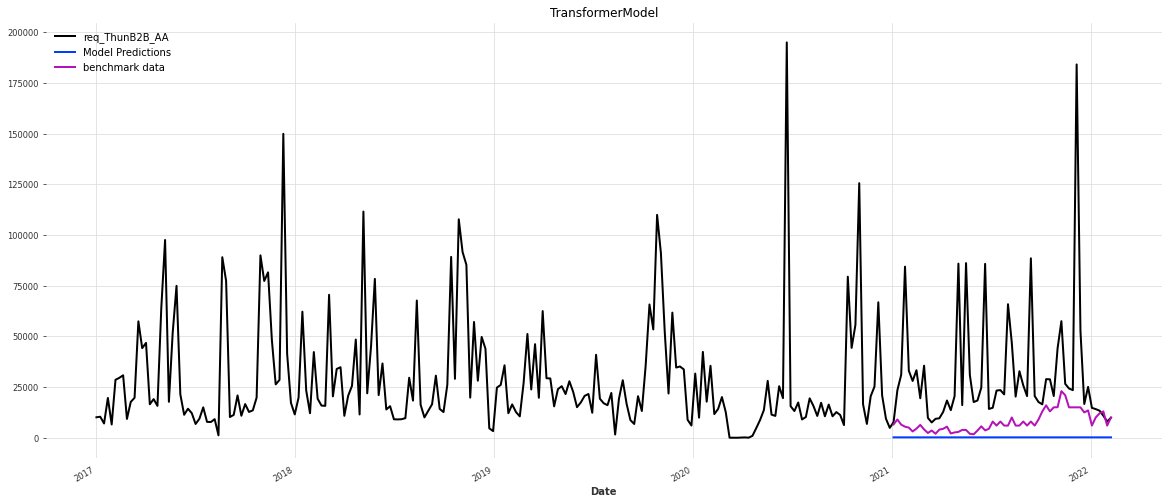

Running for  req_ThunB2B_PP


C:\Users\ashwini.kumar\source\repos\anaconda3\envs\practice\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Call the training function
Running for : AutoARIMA
Fitting the Model with Deafults Params : Auto-ARIMA
Benchmark Loss is : 11758.01724137931
Model Predict Loss is : 10119.89803000972


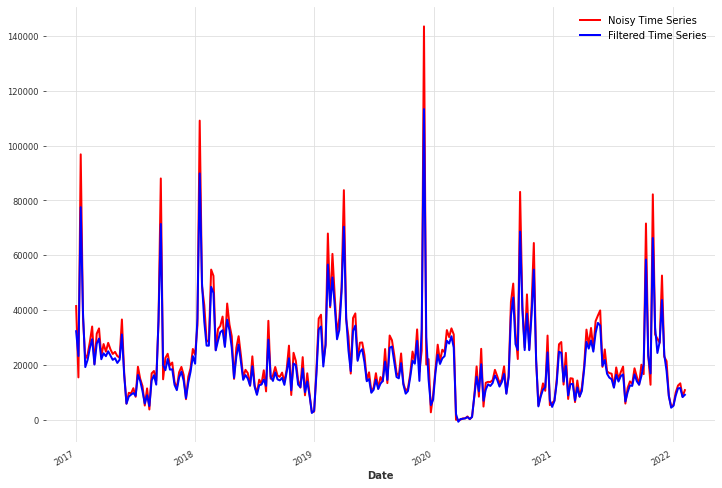

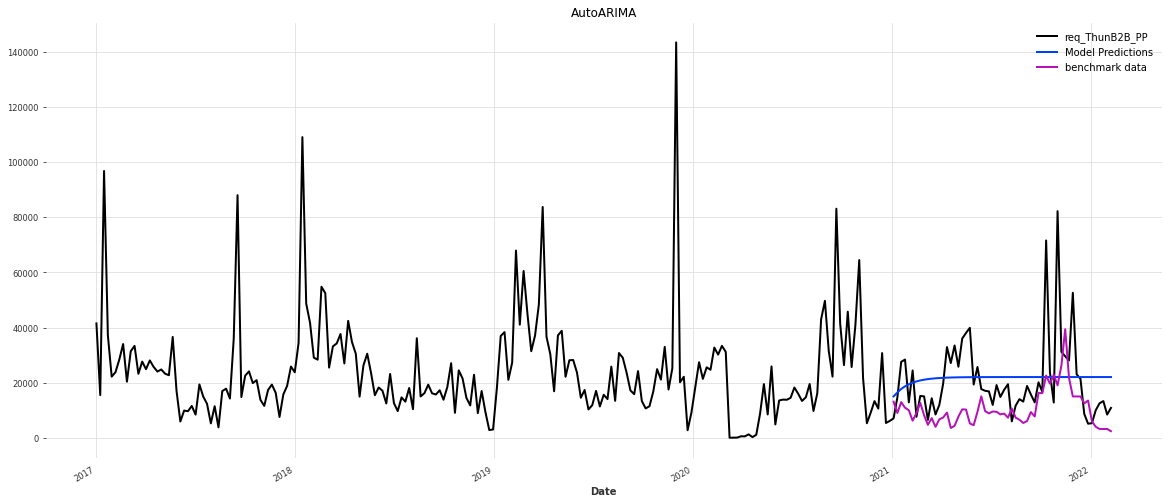

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Running for : Prophet
Fitting the Model with Deafults Params : Prophet
Benchmark Loss is : 11758.01724137931
Model Predict Loss is : 13163.50647837231


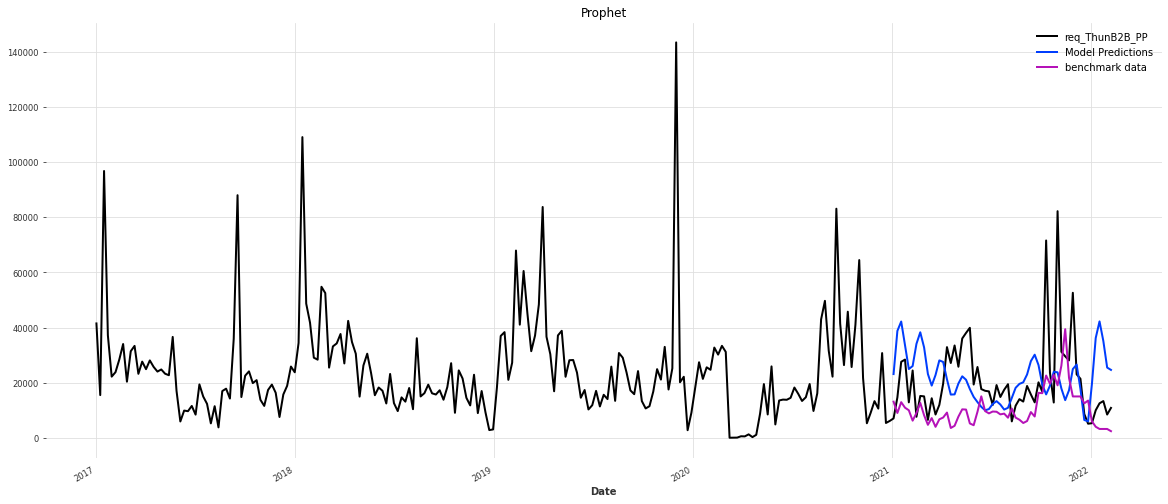

Running for : ExponentialSmoothing
Fitting the Model with Deafults Params : ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None
Benchmark Loss is : 11758.01724137931
Model Predict Loss is : 13446.448020239435


C:\Users\ashwini.kumar\source\repos\anaconda3\envs\practice\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


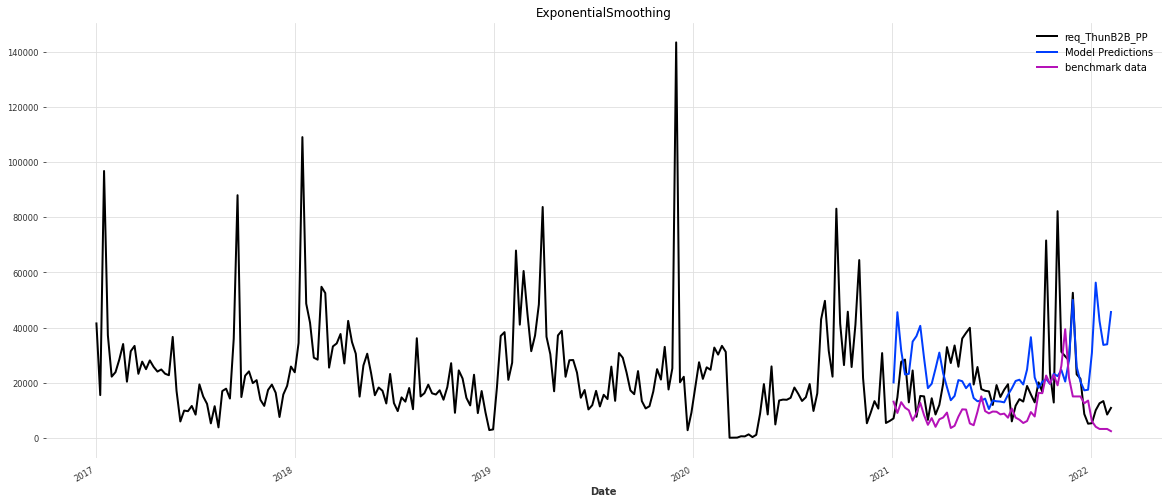

Running for : FFT
Fitting the Model with Deafults Params : FFT(nr_freqs_to_keep=10, trend=None)
Benchmark Loss is : 11758.01724137931
Model Predict Loss is : 12645.423287968248


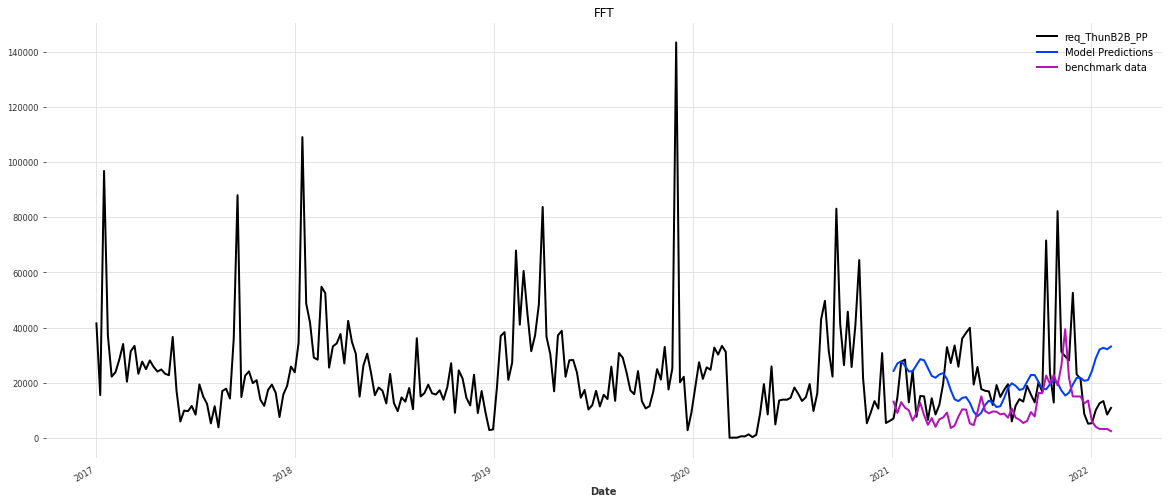

[2022-03-28 02:46:44,883] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
[2022-03-28 02:46:44,883] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 185 samples.
[2022-03-28 02:46:44,891] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 02:46:44,891] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type    | Params
--------------------------------------
0 | criterion | MSELoss | 0     
1 | rnn       | RNN     | 700   
2 | V         | Linear  

Running for : RNNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.rnn_model.RNNModel object at 0x000001918B8FD188>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 11758.01724137931
Model Predict Loss is : 20764.140522738326


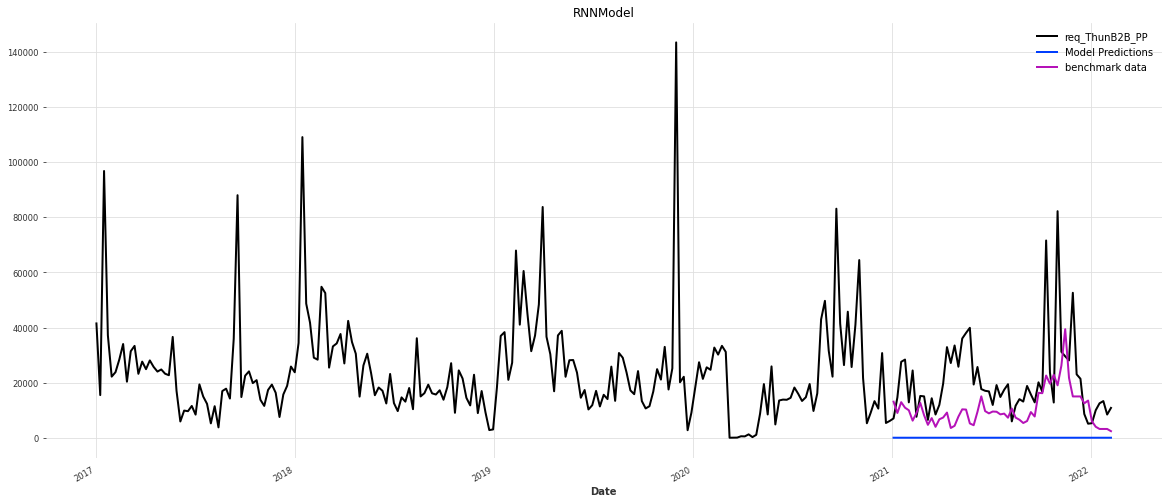

[2022-03-28 02:47:00,461] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-03-28 02:47:00,461] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-03-28 02:47:00,466] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
[2022-03-28 02:47:00,466] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
INFO:darts.models.forecasting.tcn_model:Number of layers chosen: 4
[2022-03-28 02:47:00,470] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 02:47:00,470] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available

Running for : TCNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.tcn_model.TCNModel object at 0x000001918983F508>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 11758.01724137931
Model Predict Loss is : 10896.367309037149


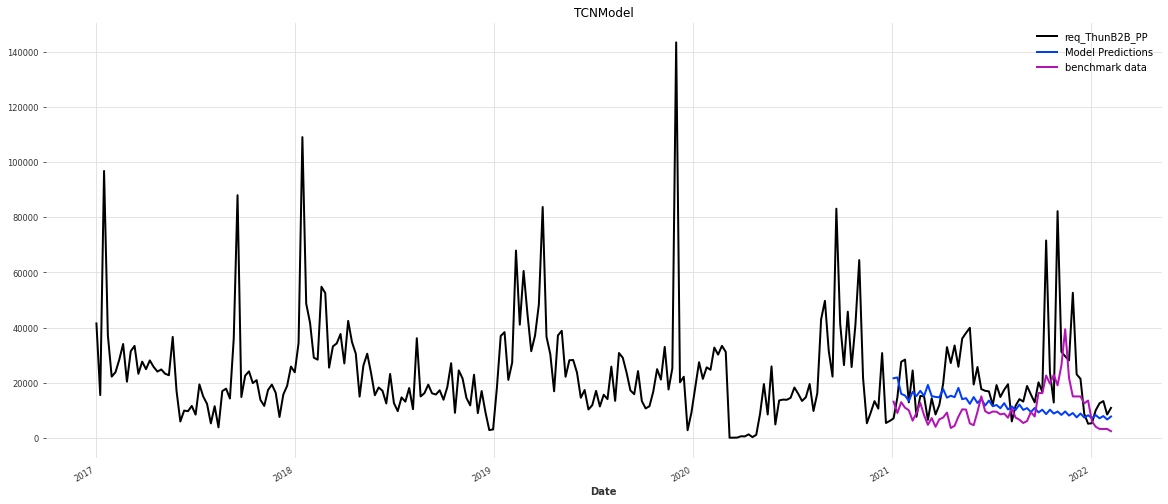

[2022-03-28 02:47:15,473] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-03-28 02:47:15,473] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-03-28 02:47:15,530] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 02:47:15,530] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type       | Params
-----------------------------------------
0 | criterion | MSELoss    | 0     
1 | stacks    | ModuleList | 6.3 M 
------------

Running for : NBEATSModel
Fitting the Model with Deafults Params : <darts.models.forecasting.nbeats.NBEATSModel object at 0x000001918B8FD048>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 11758.01724137931
Model Predict Loss is : 9672.020832037666


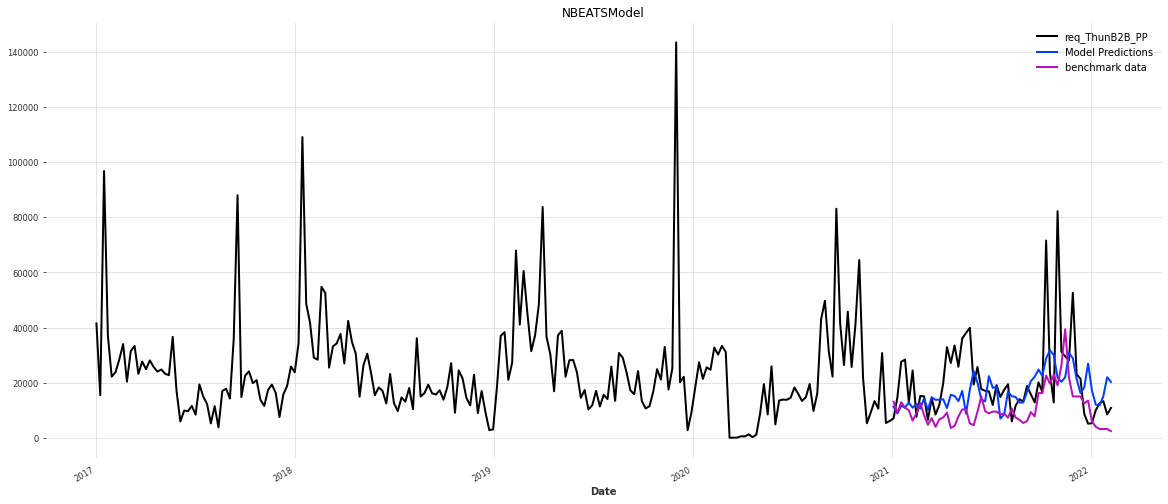

[2022-03-28 02:49:37,538] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-03-28 02:49:37,538] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-03-28 02:49:37,548] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 02:49:37,548] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             

Running for : TransformerModel
Fitting the Model with Deafults Params : <darts.models.forecasting.transformer_model.TransformerModel object at 0x000001918C278E48>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 11758.01724137931
Model Predict Loss is : 20589.60081543699


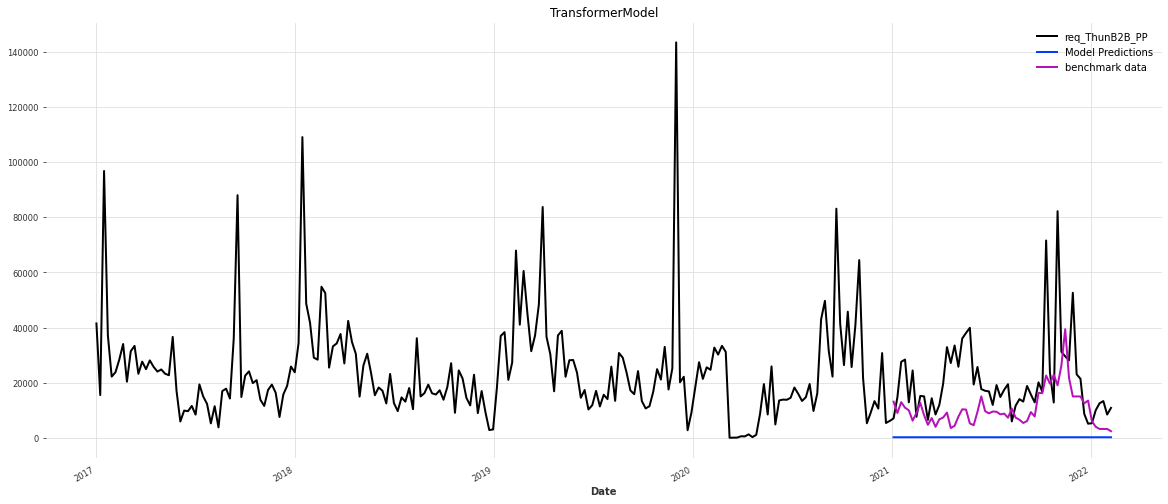

Running for  Sum_All_Variables


C:\Users\ashwini.kumar\source\repos\anaconda3\envs\practice\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Call the training function
Running for : AutoARIMA
Fitting the Model with Deafults Params : Auto-ARIMA
Benchmark Loss is : 0.0
Model Predict Loss is : 81706.06753744195


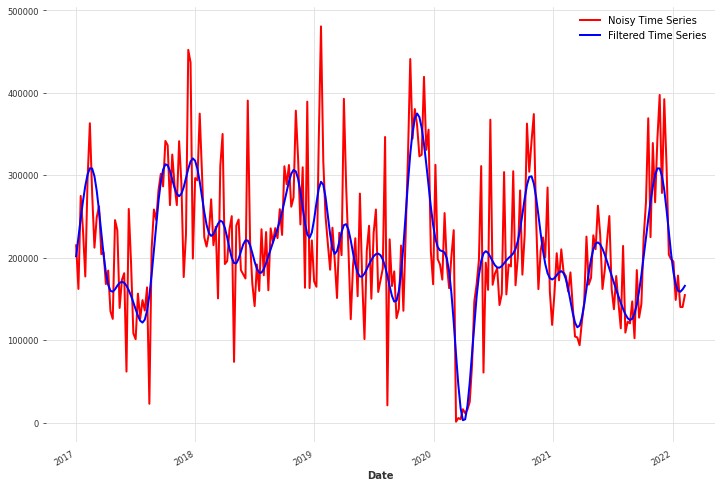

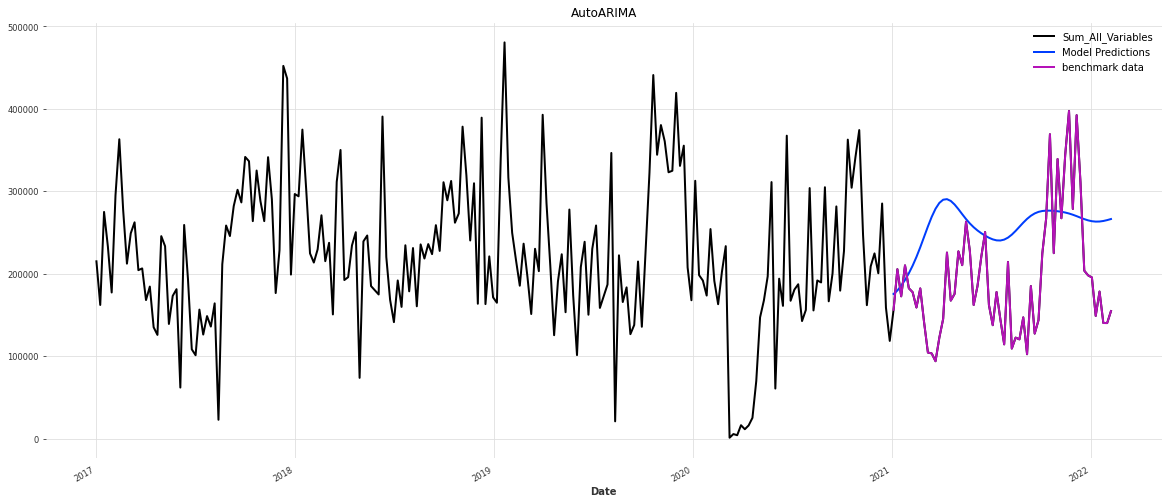

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Running for : Prophet
Fitting the Model with Deafults Params : Prophet
Benchmark Loss is : 0.0
Model Predict Loss is : 47985.11959698854


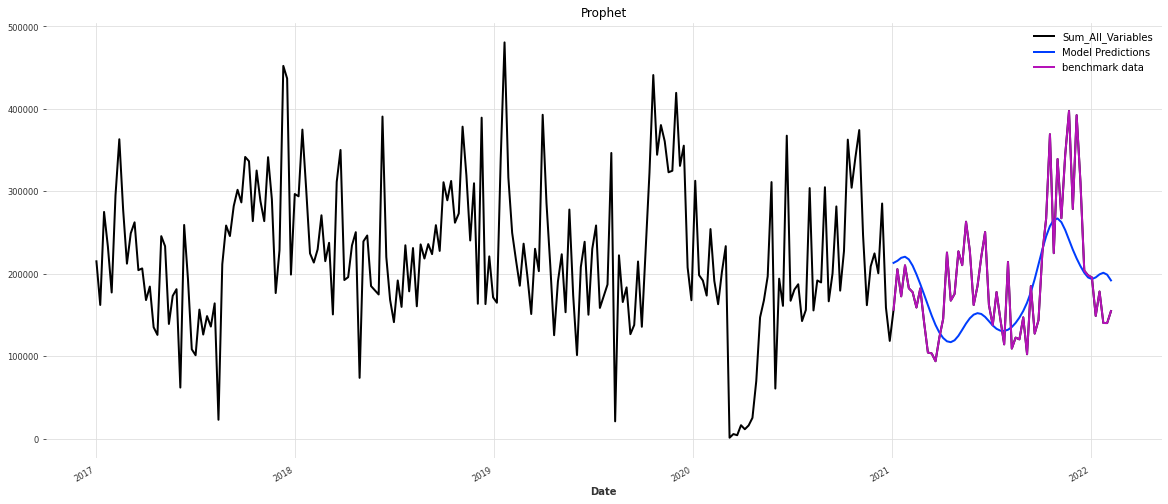

Running for : ExponentialSmoothing
Fitting the Model with Deafults Params : ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None
Benchmark Loss is : 0.0
Model Predict Loss is : 97534.42433989303


C:\Users\ashwini.kumar\source\repos\anaconda3\envs\practice\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


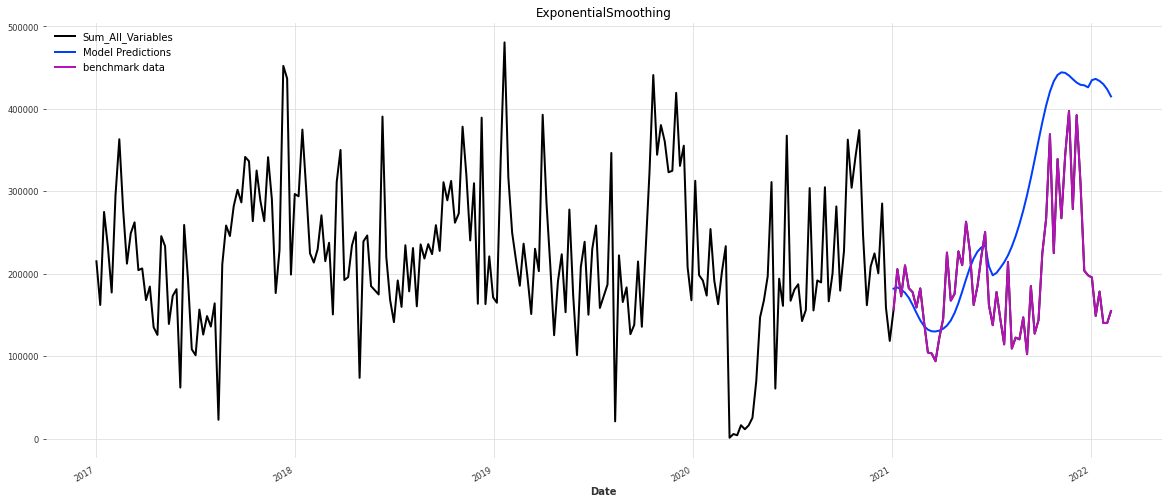

Running for : FFT
Fitting the Model with Deafults Params : FFT(nr_freqs_to_keep=10, trend=None)
Benchmark Loss is : 0.0
Model Predict Loss is : 75903.06368381903


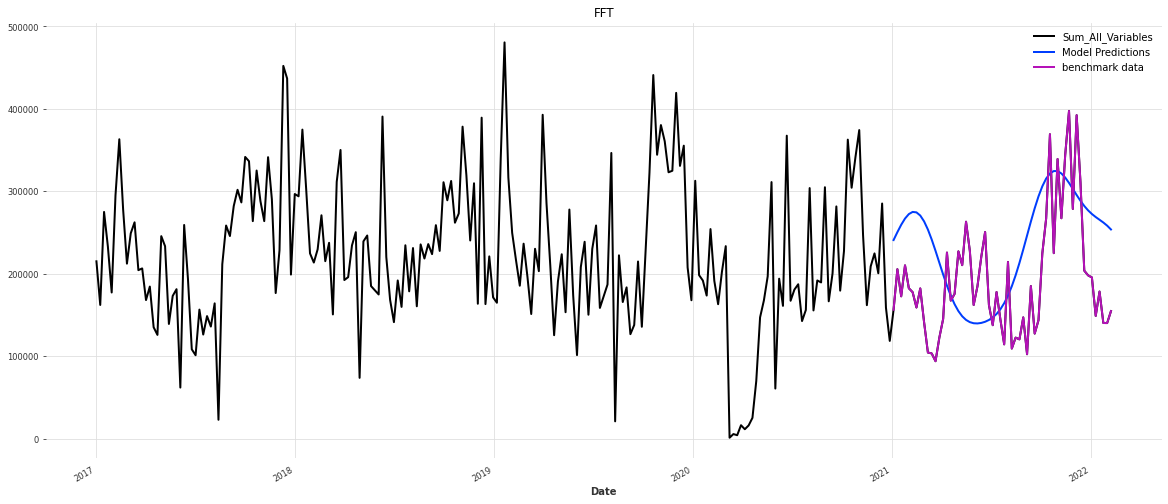

[2022-03-28 02:51:42,733] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
[2022-03-28 02:51:42,733] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 185 samples.
[2022-03-28 02:51:42,745] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 02:51:42,745] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type    | Params
--------------------------------------
0 | criterion | MSELoss | 0     
1 | rnn       | RNN     | 700   
2 | V         | Linear  

Running for : RNNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.rnn_model.RNNModel object at 0x000001918A950188>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 0.0
Model Predict Loss is : 194000.63050679115


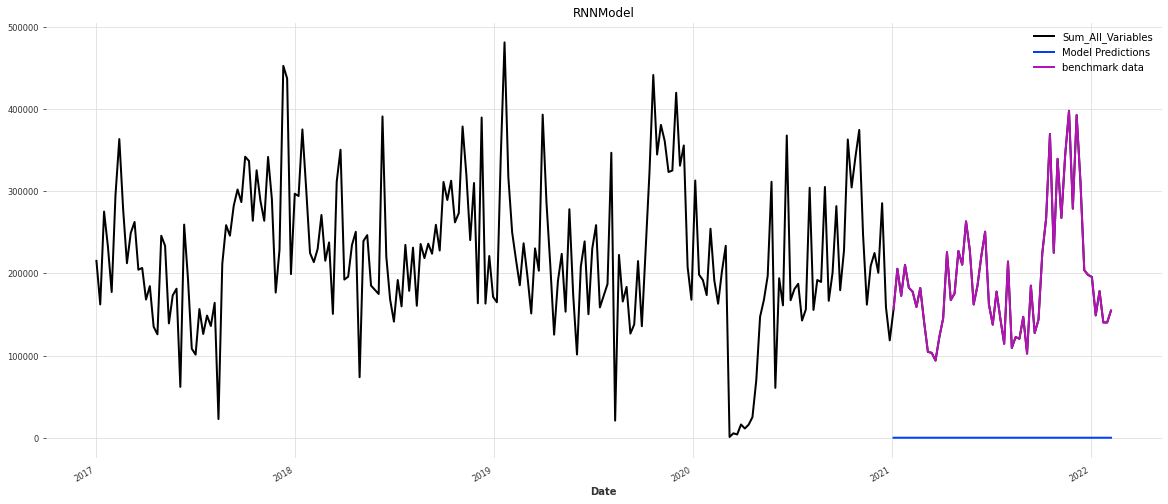

[2022-03-28 02:51:57,981] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-03-28 02:51:57,981] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-03-28 02:51:57,992] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
[2022-03-28 02:51:57,992] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
INFO:darts.models.forecasting.tcn_model:Number of layers chosen: 4
[2022-03-28 02:51:57,997] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 02:51:57,997] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available

Running for : TCNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.tcn_model.TCNModel object at 0x000001918A668D08>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 0.0
Model Predict Loss is : 63071.12395979928


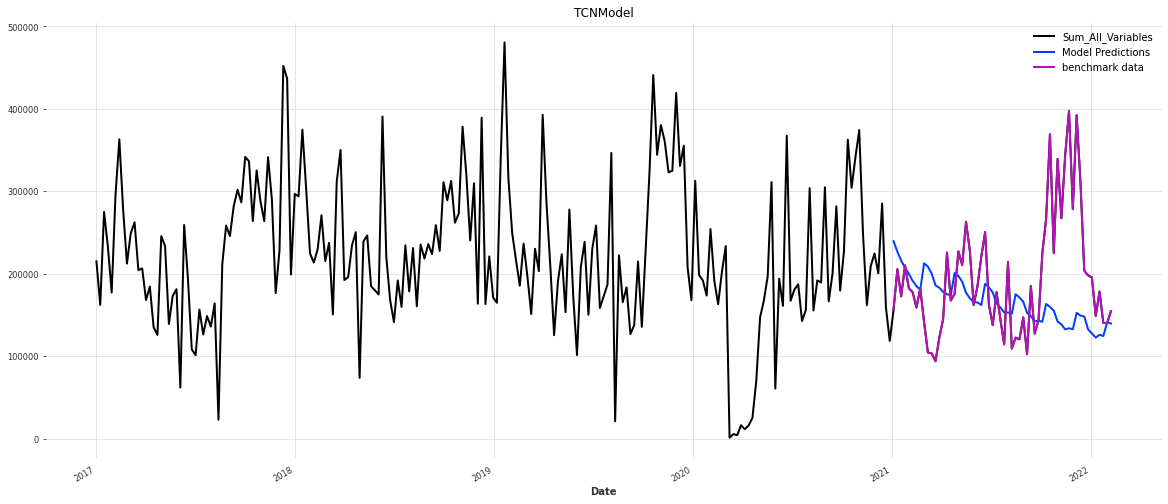

[2022-03-28 02:52:12,625] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-03-28 02:52:12,625] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-03-28 02:52:12,686] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 02:52:12,686] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type       | Params
-----------------------------------------
0 | criterion | MSELoss    | 0     
1 | stacks    | ModuleList | 6.3 M 
------------

Running for : NBEATSModel
Fitting the Model with Deafults Params : <darts.models.forecasting.nbeats.NBEATSModel object at 0x000001918A668548>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 0.0
Model Predict Loss is : 73559.34113671987


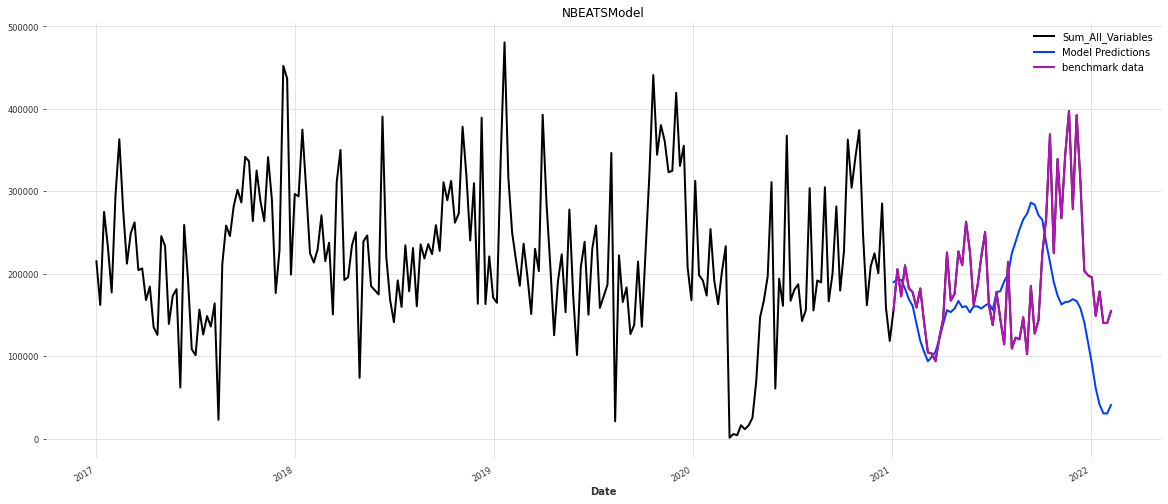

[2022-03-28 02:54:35,010] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-03-28 02:54:35,010] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-03-28 02:54:35,032] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-28 02:54:35,032] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             

Running for : TransformerModel
Fitting the Model with Deafults Params : <darts.models.forecasting.transformer_model.TransformerModel object at 0x000001918B2DD9C8>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 0.0
Model Predict Loss is : 193821.22829474398


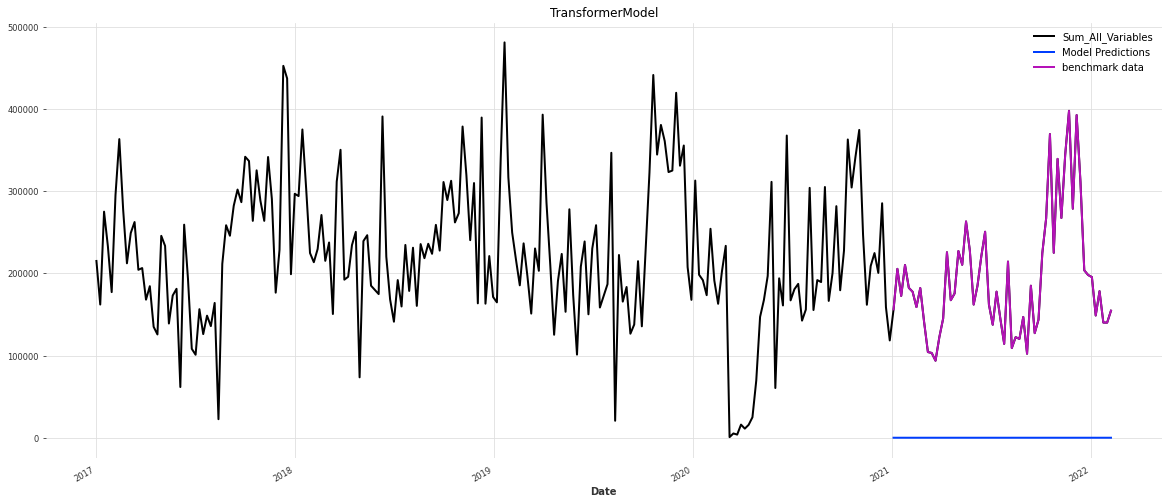

In [15]:
# Initialize the product details
import matplotlib.pyplot as plt
# Define the train function with Wandb Logging properly
def train(series_name):
    
    ## Create the directory  for our files
          try:
            os.makedirs("C:\\Users\\ashwini.kumar\\Time_Series_Modelling\\Outputs\\" + series_name + 'filtered')
          except OSError:
            pass
    
        # Define an empty Dataframe
          df = pd.DataFrame()
 # your model training code here
#           for num, model_type in enumerate([AutoARIMA(), Prophet()]):

#           for num,model_type in enumerate([ Prophet()]):

          for num,model_type in enumerate([AutoARIMA(), Prophet(), ExponentialSmoothing(),  FFT(),
                              RNNModel(input_chunk_length=32, output_chunk_length=8,n_epochs = 120, random_state = 0),
                              TCNModel(input_chunk_length=32, output_chunk_length=8,n_epochs = 120, random_state = 0),
                              NBEATSModel(input_chunk_length=32, output_chunk_length=8,n_epochs = 120, random_state = 0),
                              TransformerModel(input_chunk_length=32, output_chunk_length=8,n_epochs = 120, random_state = 0)
                           ]):
        
            list_model_names = ["AutoARIMA", "Prophet", "ExponentialSmoothing",  "FFT",
                              "RNNModel",
                              "TCNModel",
                              "NBEATSModel",
                              "TransformerModel"]
            
            print ("Running for :",list_model_names[num])
#             print (str(model_type))
            model = model_type
            print ("Fitting the Model with Deafults Params :",model_type)
            # Fit the model on training data 
            model_req = model.fit(train_data)
            #Make the prediction for 58 observation on train Data
            pred_air = model_req.predict(n = 58)
            
#             print (pred_air)
            # Predict the data for Backtesting
#             if num <= 4:
#                 pred_backtest = model.historical_forecasts(timeseries_input,
#                   start=pd.Timestamp("2020-12-28"),  forecast_horizon=4)
#             else:
#                 pred_backtest = model.historical_forecasts(timeseries_input,
#                   start=pd.Timestamp("2020-12-28"),  forecast_horizon=8, retrain=False)
#             print (pred_backtest)
#             print (len(pred_backtest))
            # Calculate the loss off model
            loss_model = mae(val_data , pred_air)
            #Calculate the loss of bencmark model
            loss_benchmark = mae(val_data, benchmark_data)
            # Calculate the loss off backtesting
#             loss_backtesting = mae(val_data,pred_backtest)
            # Print the loss function for benchmark data
            print ("Benchmark Loss is :", loss_benchmark) 
            # Print the loss function for benchmark data
            print ("Model Predict Loss is :", loss_model)      
            # Print the loss function for benchmark data
#             print ("Model Backtest Loss is :", loss_backtesting)  
            ## Add values to Dataframe
            df.loc[num, 'model'] = model_type
            df.loc[num,'loss_benchmark'] = loss_benchmark
#             df.loc[num,'loss_backtesting'] = loss_backtesting
            df.loc[num,'loss_model'] = loss_model
            # Initialize the plotting variables
            
            df.to_csv("C:\\Users\\ashwini.kumar\\Time_Series_Modelling\\Outputs\\" + series_name + 'filtered' + "\\valid_data.csv")
            plt.figure() 
            # Set the image size
            plt.rcParams["figure.figsize"] = (20,8)
            # Plot the actual time series data
            timeseries_input.plot()
            # Plot the prediction made
            pred_air.plot(label='Model Predictions', low_quantile=0.05, high_quantile=0.95)
            benchmark_data.plot(label='benchmark data', low_quantile=0.05, high_quantile=0.95)
#             pred_backtest.plot(label='Backtesting Predictions', low_quantile=0.05, high_quantile=0.95)
            plt.legend()
            plt.title(list_model_names[num])
            
            plt.savefig("C:\\Users\\ashwini.kumar\\Time_Series_Modelling\\Outputs\\" + series_name + 'filtered' + "\\" + str(list_model_names[num]) + '.png')
            plt.show()





# The function to define the train_data input data and other functions
def call_timeseries(train_column,benchmark_column):
    timeseries_input = df_to_timeseries(df,"Date",train_column)
#     print (timeseries_input)

    benchmark_input = df_to_timeseries(df,"Date",benchmark_column)
    # Set aside the data since 2021 
    
    kernel = ExpSineSquared()
    # kernel = RBF()

    gpf = GaussianProcessFilter( kernel=kernel, alpha=0.4 / 2, n_restarts_optimizer=100)
    
    filtered_x = gpf.filter(df_to_timeseries(df,"Date",train_column))
                            
    plt.figure(figsize=[12, 8])
    timeseries_input.plot(color="red", label="Noisy Time Series")
    filtered_x.plot(color="blue", label="Filtered Time Series")
    plt.legend()
#     plt.savefig(series_name + 'filtered' + "/" + train_column + '.png')

    train_data , val_data_filtered = filtered_x.split_before(pd.Timestamp('2021-01-04'))

    train_data_noisy, val_data = timeseries_input.split_before(pd.Timestamp('2021-01-04'))

    train_benchmark_ignore, benchmark_data = benchmark_input.split_before(pd.Timestamp('2021-01-04'))
    
    return train_data,val_data,benchmark_data,timeseries_input


train_series = ["req_ThunB2B_Sorter", "req_ThunB2C","req_ThunB2B_AA", "req_ThunB2B_PP",'Sum_All_Variables'  ]
benchmark_series = ["BOL_B2B Sorter Thun", "BOL_B2C Thun","BOL_B2B AA Thun", "BOL_B2B P&P Thun",'Sum_All_Variables' ]

# train_series = ['Sum_All_Variables' ]
# benchmark_series = ['Sum_All_Variables_Benchmark']


for i in range(len(train_series)):
    
    print ("Running for " , train_series[i])
    train_data,val_data,benchmark_data,timeseries_input = call_timeseries(train_series[i],benchmark_series[i])
    print ("Call the training function")
    train(train_series[i])